Work analysis script
-------------------


John Chodera, Dom Rufa, Hannah Bruce Macdonald

### FAH todo
* Figure out CPU/GPU force discrepancy
* ~~prune outliers~~
* Generate plots labeling GENS

In [1]:
import os
import numpy as np
import seaborn as sns
from pymbar import BAR
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from glob import glob
import pickle
from simtk.openmm import unit
import bz2
from freeenergyframework import plotting, stats
import pandas as pd
import json
import tqdm
from openmmtools.constants import kB
temperature = 300.0 * unit.kelvin
kT = kB * temperature

In [2]:
with bz2.BZ2File('data/work-13414.pkl.bz2', 'r') as infile:
    work = pickle.load(infile)

In [3]:
work.replace([np.inf, -np.inf], np.nan)
work = work.dropna()

def _strip_outliers(w,n_devs=3):
    w = [x for x in w if np.abs(x) < 10**4]
    mean = np.mean(w)
    std = np.std(w)
    good_w = [x for x in w if np.abs(x-mean) < n_devs*std]
    return good_w

In [4]:
work

PROJ      RUN    CLONE   GEN forward_work reverse_work  \
0       PROJ13414   RUN532  CLONE63  GEN0      14.7479     -6.06399   
1       PROJ13414   RUN532  CLONE96  GEN0      10.1776      0.65693   
2       PROJ13414   RUN532   CLONE1  GEN1      17.2159       1.7618   
3       PROJ13414   RUN532   CLONE2  GEN1     -5.19221      6.50278   
4       PROJ13414   RUN532  CLONE63  GEN1      13.1701     -13.8907   
5       PROJ13414   RUN532   CLONE2  GEN0      15.0401      8.33584   
6       PROJ13414   RUN532   CLONE1  GEN0       13.392      6.73406   
7       PROJ13414   RUN532  CLONE96  GEN1      15.8784        2.011   
8       PROJ13414   RUN532  CLONE29  GEN0      11.6013      5.36597   
9       PROJ13414   RUN532  CLONE30  GEN1      14.2867      3.42007   
10      PROJ13414   RUN532  CLONE30  GEN0      12.8247     -7.71169   
11      PROJ13414   RUN532  CLONE86  GEN1      11.1802      4.83013   
12      PROJ13414   RUN532  CLONE86  GEN0      13.5798      4.91621   
13      PROJ13414   RUN532  CLONE27  GEN1      14.2473      9.34756   
14      PROJ13414   RUN532  CLONE27  GEN0      13.1598      2.89355   
15      PROJ13414   RUN532  CLONE47  GEN1      14.0484       9.2037   
16      PROJ13414   RUN532  CLONE47  GEN0       13.474     -5.49011   
17      PROJ13414   RUN532  CLONE19  GEN1      12.9881      5.38465   
18      PROJ13414   RUN532  CLONE44  GEN1      13.5483     -10.6949   
19      PROJ13414   RUN532  CLONE32  GEN1      14.2609      3.23127   
20      PROJ13414   RUN532  CLONE19  GEN0      11.3045      3.83649   
21      PROJ13414   RUN532  CLONE44  GEN0      13.0733     -12.9757   
22      PROJ13414   RUN532  CLONE69  GEN1      13.9709      7.01243   
23      PROJ13414   RUN532  CLONE69  GEN0      12.9795     -8.34358   
24      PROJ13414   RUN532  CLONE32  GEN0      15.1348     -12.7622   
25      PROJ13414   RUN532  CLONE54  GEN1      9.87068      4.34928   
26      PROJ13414   RUN532  CLONE54  GEN0      15.3698     -11.6729   
27      PROJ13414   RUN532  CLONE22  GEN1      15.0882      5.08044   
28      PROJ13414   RUN532  CLONE17  GEN1      14.1796    -0.860499   
29      PROJ13414   RUN532  CLONE17  GEN0      12.6281        4.861   
...           ...      ...      ...   ...          ...          ...   
981463  PROJ13415  RUN1574  CLONE34  GEN1      3.93496     -3.35661   
981464  PROJ13415  RUN1574  CLONE34  GEN0      11.1729     -2.25854   
981465  PROJ13415  RUN1574  CLONE11  GEN1      3.38433     -1.90916   
981466  PROJ13415  RUN1574  CLONE11  GEN0      11.2183     -3.56304   
981467  PROJ13415  RUN1574  CLONE12  GEN1      3.36522     -1.52398   
981468  PROJ13415  RUN1574  CLONE12  GEN0      10.1204    -0.572887   
981469  PROJ13415  RUN1574  CLONE24  GEN1      3.50272     -2.38363   
981470  PROJ13415  RUN1574  CLONE24  GEN0      10.8284     -2.59878   
981471  PROJ13415  RUN1574  CLONE35  GEN0      10.2823     -3.31266   
981472  PROJ13415  RUN1574   CLONE4  GEN1      2.60769     -1.83032   
981473  PROJ13415  RUN1574   CLONE4  GEN0      11.2473     -0.20027   
981474  PROJ13415  RUN1574   CLONE7  GEN1      3.14391     -2.84446   
981475  PROJ13415  RUN1574  CLONE31  GEN1      4.31882     -3.31773   
981476  PROJ13415  RUN1574  CLONE31  GEN0      9.48056     -3.14784   
981477  PROJ13415  RUN1574   CLONE7  GEN0      10.0327     -0.81548   
981478  PROJ13415  RUN1574  CLONE21  GEN1      2.40764    0.0702894   
981479  PROJ13415  RUN1574  CLONE21  GEN0      11.1463     -2.88397   
981480  PROJ13415  RUN1574   CLONE5  GEN1         3.48     -2.00038   
981481  PROJ13415  RUN1574  CLONE33  GEN0      10.7125     0.754746   
981482  PROJ13415  RUN1574   CLONE5  GEN0      11.1115     -3.04386   
981483  PROJ13415  RUN1574  CLONE26  GEN1      3.44341     -2.63206   
981484  PROJ13415  RUN1574  CLONE15  GEN1      3.01489     -1.43539   
981485  PROJ13415  RUN1574  CLONE26  GEN0      10.3054     -3.20482   
981486  PROJ13415  RUN1574  CLONE15  GEN0      10.4934     -2.54036   
981487  PROJ13415  RUN1574   CLONE9  

In [5]:
with open('json-files/13414/update.json', 'r') as f:
    details = json.load(f)

In [6]:
projects = {
    'complex' : 'PROJ13414',
    'solvent' : 'PROJ13415'}


plotting = False

for d in tqdm.tqdm(details.values()):
    RUN = d['directory']
    
    if plotting:
        fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(10,5))
    free_energy = {}
    for i, phase in enumerate(projects.keys()):
        if plotting:
            axes[i].set_title(phase)
        # TODO remove stripping out? Is anything being thrown away?
        f_works = _strip_outliers(work[work['RUN']==RUN][work['PROJ']==projects[phase]].forward_work,n_devs=100)
        r_works = _strip_outliers(work[work['RUN']==RUN][work['PROJ']==projects[phase]].reverse_work,n_devs=100)
        if any([True for x in [f_works, r_works] if len(x) < 1]):
            print(f'Cant calculate {RUN} {phase}')
            continue
        if plotting:
            sns.kdeplot(f_works,shade=True,color='cornflowerblue',ax=axes[i])
            sns.rugplot(f_works,ax=axes[i],color='cornflowerblue',alpha=0.5,label=f'forward : N={len(f_works)}')
            sns.kdeplot([-x for x in r_works],shade=True,color='hotpink',ax=axes[i])
            sns.rugplot([-x for x in r_works],ax=axes[i],color='hotpink',alpha=0.5,label=f'reverse : N={len(r_works)}')
        d[f'{phase}_fes'] = BAR(np.asarray(f_works),np.asarray(r_works))        
        d[f'n_{phase}'] = len(f_works) + len(r_works)
        f_works = _strip_outliers(work[work['RUN']==RUN][work['PROJ']==projects[phase]][work['GEN']=='GEN0'].forward_work)
        r_works = _strip_outliers(work[work['RUN']==RUN][work['PROJ']==projects[phase]][work['GEN']=='GEN0'].reverse_work)
        
        if any([True for x in [f_works, r_works] if len(x) < 1]):
            print(f'Cant calculate {RUN} {phase}')
            continue
        if plotting:
            sns.rugplot(f_works,ax=axes[i],color='darkblue',label=f'forward (gen0) : N={len(f_works)}')
            sns.rugplot([-x for x in r_works],ax=axes[i],color='mediumvioletred',label=f'reverse (gen0) : N={len(r_works)}')
        d[f'{phase}_fes_GEN0'] = BAR(np.asarray(f_works),np.asarray(r_works))

        
        f_works = _strip_outliers(work[work['RUN']==RUN][work['PROJ']==projects[phase]][work['GEN']=='GEN1'].forward_work)
        r_works = _strip_outliers(work[work['RUN']==RUN][work['PROJ']==projects[phase]][work['GEN']=='GEN1'].reverse_work)
        if any([True for x in [f_works, r_works] if len(x) < 1]):
            print(f'Cant calculate {RUN} {phase}')
            continue
        d[f'{phase}_fes_GEN1'] = BAR(np.asarray(f_works),np.asarray(r_works))        
        
    if plotting:    
        fig.suptitle(f"{RUN}: {d['protein'].split('_')[0]} {d['start']}-{d['end']}", fontsize=16)
        fig.subplots_adjust(top=0.9,wspace=0.15)
        axes[0].legend()
        axes[1].legend()
        plt.show()

  0%|          | 0/4548 [00:00<?, ?it/s]/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

  1%| 

Cant calculate RUN49 complex
Cant calculate RUN49 solvent


  2%|▏         | 93/4548 [01:59<1:12:40,  1.02it/s]

Cant calculate RUN92 complex
Cant calculate RUN92 solvent


  3%|▎         | 119/4548 [02:32<1:15:19,  1.02s/it]

Cant calculate RUN118 complex
Cant calculate RUN118 solvent


  3%|▎         | 120/4548 [02:32<59:34,  1.24it/s]  

Cant calculate RUN119 complex
Cant calculate RUN119 solvent


  3%|▎         | 123/4548 [02:35<1:02:11,  1.19it/s]

Cant calculate RUN122 complex
Cant calculate RUN122 solvent


  3%|▎         | 124/4548 [02:36<50:39,  1.46it/s]  

Cant calculate RUN123 complex
Cant calculate RUN123 solvent


  3%|▎         | 131/4548 [02:44<1:13:04,  1.01it/s]

Cant calculate RUN130 complex
Cant calculate RUN130 solvent


  3%|▎         | 132/4548 [02:44<58:39,  1.25it/s]  

Cant calculate RUN131 complex
Cant calculate RUN131 solvent


  3%|▎         | 142/4548 [02:58<1:24:06,  1.15s/it]

Cant calculate RUN141 complex
Cant calculate RUN141 solvent


  3%|▎         | 155/4548 [03:16<1:13:56,  1.01s/it]

Cant calculate RUN154 complex
Cant calculate RUN154 solvent


  3%|▎         | 156/4548 [03:16<58:54,  1.24it/s]  

Cant calculate RUN155 complex
Cant calculate RUN155 solvent


  6%|▋         | 289/4548 [06:12<1:19:20,  1.12s/it]

Cant calculate RUN288 solvent


  7%|▋         | 318/4548 [06:48<1:18:57,  1.12s/it]

Cant calculate RUN317 solvent


  8%|▊         | 386/4548 [08:14<1:18:16,  1.13s/it]

Cant calculate RUN385 solvent


 12%|█▏        | 544/4548 [11:35<1:24:10,  1.26s/it]

Cant calculate RUN544 complex


 12%|█▏        | 545/4548 [11:36<1:24:31,  1.27s/it]

Cant calculate RUN544 solvent


 12%|█▏        | 553/4548 [11:46<1:05:50,  1.01it/s]

Cant calculate RUN552 complex
Cant calculate RUN552 solvent


 12%|█▏        | 557/4548 [11:50<1:01:03,  1.09it/s]

Cant calculate RUN556 complex
Cant calculate RUN556 solvent


 12%|█▏        | 561/4548 [11:54<59:26,  1.12it/s]  

Cant calculate RUN560 complex
Cant calculate RUN560 solvent


 14%|█▍        | 642/4548 [13:43<1:31:19,  1.40s/it]

Cant calculate RUN642 complex


 14%|█▍        | 651/4548 [13:54<1:07:40,  1.04s/it]

Cant calculate RUN650 complex
Cant calculate RUN650 solvent


 14%|█▍        | 655/4548 [13:58<1:02:36,  1.04it/s]

Cant calculate RUN654 complex
Cant calculate RUN654 solvent


 14%|█▍        | 659/4548 [14:02<1:01:09,  1.06it/s]

Cant calculate RUN658 complex
Cant calculate RUN658 solvent


 16%|█▌        | 727/4548 [15:33<1:06:51,  1.05s/it]

Cant calculate RUN726 complex
Cant calculate RUN726 solvent


 17%|█▋        | 757/4548 [16:11<1:04:30,  1.02s/it]

Cant calculate RUN756 complex
Cant calculate RUN756 solvent


 18%|█▊        | 808/4548 [17:18<1:03:50,  1.02s/it]

Cant calculate RUN807 complex
Cant calculate RUN807 solvent


 19%|█▊        | 851/4548 [18:14<1:04:04,  1.04s/it]

Cant calculate RUN850 complex
Cant calculate RUN850 solvent


 19%|█▉        | 877/4548 [18:48<1:02:50,  1.03s/it]

Cant calculate RUN876 complex
Cant calculate RUN876 solvent


 19%|█▉        | 878/4548 [18:48<49:48,  1.23it/s]  

Cant calculate RUN877 complex
Cant calculate RUN877 solvent


 19%|█▉        | 881/4548 [18:51<52:25,  1.17it/s]  

Cant calculate RUN880 complex
Cant calculate RUN880 solvent


 19%|█▉        | 882/4548 [18:52<42:31,  1.44it/s]

Cant calculate RUN881 complex
Cant calculate RUN881 solvent


 20%|█▉        | 889/4548 [19:00<59:14,  1.03it/s]  

Cant calculate RUN888 complex
Cant calculate RUN888 solvent


 20%|█▉        | 890/4548 [19:00<47:16,  1.29it/s]

Cant calculate RUN889 complex
Cant calculate RUN889 solvent


 20%|█▉        | 900/4548 [19:13<1:01:16,  1.01s/it]

Cant calculate RUN899 complex
Cant calculate RUN899 solvent


 20%|██        | 913/4548 [19:29<1:01:48,  1.02s/it]

Cant calculate RUN912 complex
Cant calculate RUN912 solvent


 20%|██        | 914/4548 [19:29<49:09,  1.23it/s]  

Cant calculate RUN913 complex
Cant calculate RUN913 solvent


 22%|██▏       | 1008/4548 [21:33<1:01:49,  1.05s/it]

Cant calculate RUN1007 complex
Cant calculate RUN1007 solvent


 22%|██▏       | 1011/4548 [21:37<1:14:07,  1.26s/it]

Cant calculate RUN1011 complex


 22%|██▏       | 1012/4548 [21:38<1:15:58,  1.29s/it]

Cant calculate RUN1011 solvent


 24%|██▍       | 1105/4548 [23:43<1:09:09,  1.21s/it]

Cant calculate RUN1104 complex
Cant calculate RUN1104 solvent


 26%|██▋       | 1201/4548 [25:52<58:10,  1.04s/it]  

Cant calculate RUN1200 complex
Cant calculate RUN1200 solvent


 29%|██▉       | 1311/4548 [28:20<56:17,  1.04s/it]  

Cant calculate RUN1310 complex
Cant calculate RUN1310 solvent


 29%|██▉       | 1315/4548 [28:24<52:20,  1.03it/s]  

Cant calculate RUN1314 complex
Cant calculate RUN1314 solvent


 29%|██▉       | 1319/4548 [28:29<51:20,  1.05it/s]  

Cant calculate RUN1318 complex
Cant calculate RUN1318 solvent


 29%|██▉       | 1325/4548 [28:36<53:33,  1.00it/s]  

Cant calculate RUN1324 complex
Cant calculate RUN1324 solvent


 31%|███       | 1393/4548 [30:06<54:44,  1.04s/it]  

Cant calculate RUN1392 complex
Cant calculate RUN1392 solvent


 31%|███       | 1409/4548 [30:27<54:32,  1.04s/it]  

Cant calculate RUN1408 complex
Cant calculate RUN1408 solvent


 31%|███       | 1413/4548 [30:31<50:26,  1.04it/s]  

Cant calculate RUN1412 complex
Cant calculate RUN1412 solvent


 31%|███       | 1417/4548 [30:36<49:47,  1.05it/s]  

Cant calculate RUN1416 complex
Cant calculate RUN1416 solvent


 33%|███▎      | 1485/4548 [32:06<52:53,  1.04s/it]  

Cant calculate RUN1484 complex
Cant calculate RUN1484 solvent


 33%|███▎      | 1515/4548 [32:46<52:41,  1.04s/it]  

Cant calculate RUN1514 complex
Cant calculate RUN1514 solvent


 33%|███▎      | 1523/4548 [32:56<51:59,  1.03s/it]  

Cant calculate RUN1522 complex
Cant calculate RUN1522 solvent


 34%|███▎      | 1526/4548 [32:59<54:45,  1.09s/it]

Cant calculate RUN1525 solvent


 34%|███▍      | 1566/4548 [33:52<51:44,  1.04s/it]  

Cant calculate RUN1565 complex
Cant calculate RUN1565 solvent


 35%|███▍      | 1588/4548 [34:22<59:01,  1.20s/it]  

Cant calculate RUN1587 solvent


 35%|███▍      | 1591/4548 [34:25<56:36,  1.15s/it]  

Cant calculate RUN1590 solvent


 35%|███▌      | 1609/4548 [34:49<51:14,  1.05s/it]  

Cant calculate RUN1608 complex
Cant calculate RUN1608 solvent


 35%|███▌      | 1612/4548 [34:52<46:05,  1.06it/s]

Cant calculate RUN1611 complex
Cant calculate RUN1611 solvent


 36%|███▌      | 1635/4548 [35:22<50:53,  1.05s/it]  

Cant calculate RUN1634 complex
Cant calculate RUN1634 solvent


 36%|███▌      | 1636/4548 [35:22<40:53,  1.19it/s]

Cant calculate RUN1635 complex
Cant calculate RUN1635 solvent


 36%|███▌      | 1639/4548 [35:25<42:06,  1.15it/s]

Cant calculate RUN1638 complex
Cant calculate RUN1638 solvent


 36%|███▌      | 1640/4548 [35:25<34:18,  1.41it/s]

Cant calculate RUN1639 complex
Cant calculate RUN1639 solvent


 36%|███▌      | 1647/4548 [35:34<47:52,  1.01it/s]  

Cant calculate RUN1646 complex
Cant calculate RUN1646 solvent


 36%|███▌      | 1648/4548 [35:34<38:17,  1.26it/s]

Cant calculate RUN1647 complex
Cant calculate RUN1647 solvent


 36%|███▋      | 1658/4548 [35:47<49:40,  1.03s/it]  

Cant calculate RUN1657 complex
Cant calculate RUN1657 solvent


 37%|███▋      | 1671/4548 [36:03<50:07,  1.05s/it]  

Cant calculate RUN1670 complex
Cant calculate RUN1670 solvent


 37%|███▋      | 1672/4548 [36:03<39:52,  1.20it/s]

Cant calculate RUN1671 complex
Cant calculate RUN1671 solvent


 38%|███▊      | 1725/4548 [37:14<48:56,  1.04s/it]  

Cant calculate RUN1724 complex
Cant calculate RUN1724 solvent


 39%|███▊      | 1758/4548 [37:58<48:37,  1.05s/it]  

Cant calculate RUN1757 complex
Cant calculate RUN1757 solvent


 39%|███▉      | 1770/4548 [38:13<48:13,  1.04s/it]  

Cant calculate RUN1769 complex
Cant calculate RUN1769 solvent


 39%|███▉      | 1779/4548 [38:24<47:30,  1.03s/it]  

Cant calculate RUN1778 complex
Cant calculate RUN1778 solvent


 41%|████      | 1863/4548 [40:16<46:41,  1.04s/it]  

Cant calculate RUN1862 complex
Cant calculate RUN1862 solvent


 43%|████▎     | 1938/4548 [42:01<47:16,  1.09s/it]  

Cant calculate RUN1937 complex
Cant calculate RUN1937 solvent


 45%|████▍     | 2036/4548 [44:13<42:58,  1.03s/it]  

Cant calculate RUN2035 complex
Cant calculate RUN2035 solvent


 45%|████▌     | 2069/4548 [44:56<42:07,  1.02s/it]  

Cant calculate RUN2068 complex
Cant calculate RUN2068 solvent


 46%|████▌     | 2073/4548 [45:01<39:33,  1.04it/s]

Cant calculate RUN2072 complex
Cant calculate RUN2072 solvent


 46%|████▌     | 2077/4548 [45:05<38:19,  1.07it/s]

Cant calculate RUN2076 complex
Cant calculate RUN2076 solvent


 48%|████▊     | 2167/4548 [47:04<44:35,  1.12s/it]

Cant calculate RUN2166 complex
Cant calculate RUN2166 solvent


 48%|████▊     | 2171/4548 [47:08<39:12,  1.01it/s]

Cant calculate RUN2170 complex
Cant calculate RUN2170 solvent


 48%|████▊     | 2175/4548 [47:12<39:26,  1.00it/s]

Cant calculate RUN2174 complex
Cant calculate RUN2174 solvent


 48%|████▊     | 2177/4548 [47:14<34:50,  1.13it/s]

Cant calculate RUN2176 complex
Cant calculate RUN2176 solvent


 49%|████▉     | 2243/4548 [48:42<40:16,  1.05s/it]

Cant calculate RUN2242 complex
Cant calculate RUN2242 solvent


 49%|████▉     | 2251/4548 [48:52<39:23,  1.03s/it]

Cant calculate RUN2250 complex
Cant calculate RUN2250 solvent


 51%|█████     | 2324/4548 [50:29<38:07,  1.03s/it]

Cant calculate RUN2323 complex
Cant calculate RUN2323 solvent


 52%|█████▏    | 2367/4548 [51:25<37:27,  1.03s/it]

Cant calculate RUN2366 complex
Cant calculate RUN2366 solvent


 53%|█████▎    | 2388/4548 [51:53<37:36,  1.04s/it]

Cant calculate RUN2387 complex
Cant calculate RUN2387 solvent


 53%|█████▎    | 2393/4548 [51:59<36:41,  1.02s/it]

Cant calculate RUN2392 complex
Cant calculate RUN2392 solvent


 53%|█████▎    | 2394/4548 [51:59<29:17,  1.23it/s]

Cant calculate RUN2393 complex
Cant calculate RUN2393 solvent


 53%|█████▎    | 2397/4548 [52:02<31:32,  1.14it/s]

Cant calculate RUN2396 complex
Cant calculate RUN2396 solvent


 53%|█████▎    | 2398/4548 [52:03<26:07,  1.37it/s]

Cant calculate RUN2397 complex
Cant calculate RUN2397 solvent


 53%|█████▎    | 2405/4548 [52:13<39:17,  1.10s/it]

Cant calculate RUN2404 complex
Cant calculate RUN2404 solvent


 53%|█████▎    | 2406/4548 [52:13<31:04,  1.15it/s]

Cant calculate RUN2405 complex
Cant calculate RUN2405 solvent


 53%|█████▎    | 2416/4548 [52:26<37:21,  1.05s/it]

Cant calculate RUN2415 complex
Cant calculate RUN2415 solvent


 53%|█████▎    | 2428/4548 [52:41<42:24,  1.20s/it]

Cant calculate RUN2427 solvent
Cant calculate RUN2428 complex


 53%|█████▎    | 2429/4548 [52:42<33:09,  1.07it/s]

Cant calculate RUN2428 solvent
Cant calculate RUN2429 complex


 53%|█████▎    | 2430/4548 [52:42<26:38,  1.32it/s]

Cant calculate RUN2429 solvent


 54%|█████▍    | 2478/4548 [53:46<36:16,  1.05s/it]

Cant calculate RUN2477 complex
Cant calculate RUN2477 solvent


 56%|█████▋    | 2563/4548 [55:41<34:38,  1.05s/it]

Cant calculate RUN2562 complex
Cant calculate RUN2562 solvent


 57%|█████▋    | 2584/4548 [56:09<34:03,  1.04s/it]

Cant calculate RUN2583 complex
Cant calculate RUN2583 solvent


 57%|█████▋    | 2592/4548 [56:19<33:40,  1.03s/it]

Cant calculate RUN2591 complex
Cant calculate RUN2591 solvent


 59%|█████▊    | 2662/4548 [57:53<42:26,  1.35s/it]

Cant calculate RUN2662 complex


 59%|█████▊    | 2663/4548 [57:54<42:19,  1.35s/it]

Cant calculate RUN2662 solvent


 59%|█████▊    | 2667/4548 [57:58<32:37,  1.04s/it]

Cant calculate RUN2666 complex
Cant calculate RUN2666 solvent


 59%|█████▊    | 2669/4548 [58:00<32:37,  1.04s/it]

Cant calculate RUN2668 solvent


 59%|█████▉    | 2673/4548 [58:05<30:33,  1.02it/s]

Cant calculate RUN2672 complex
Cant calculate RUN2672 solvent


 62%|██████▏   | 2804/4548 [1:01:01<30:06,  1.04s/it]

Cant calculate RUN2803 complex
Cant calculate RUN2803 solvent


 62%|██████▏   | 2827/4548 [1:01:31<29:50,  1.04s/it]

Cant calculate RUN2826 complex
Cant calculate RUN2826 solvent


 62%|██████▏   | 2831/4548 [1:01:35<27:41,  1.03it/s]

Cant calculate RUN2830 complex
Cant calculate RUN2830 solvent


 62%|██████▏   | 2835/4548 [1:01:39<27:20,  1.04it/s]

Cant calculate RUN2834 complex
Cant calculate RUN2834 solvent


 64%|██████▍   | 2918/4548 [1:03:32<27:18,  1.01s/it]

Cant calculate RUN2917 complex
Cant calculate RUN2917 solvent


 64%|██████▍   | 2925/4548 [1:03:40<26:31,  1.02it/s]

Cant calculate RUN2924 complex
Cant calculate RUN2924 solvent


 64%|██████▍   | 2929/4548 [1:03:45<25:03,  1.08it/s]

Cant calculate RUN2928 complex
Cant calculate RUN2928 solvent


 64%|██████▍   | 2933/4548 [1:03:49<24:32,  1.10it/s]

Cant calculate RUN2932 complex
Cant calculate RUN2932 solvent


 66%|██████▌   | 2995/4548 [1:05:07<25:35,  1.01it/s]

Cant calculate RUN2994 complex
Cant calculate RUN2994 solvent


 66%|██████▌   | 3001/4548 [1:05:14<24:34,  1.05it/s]

Cant calculate RUN3000 complex
Cant calculate RUN3000 solvent


 66%|██████▌   | 3008/4548 [1:05:23<32:04,  1.25s/it]

Cant calculate RUN3008 complex


 66%|██████▌   | 3009/4548 [1:05:24<32:11,  1.26s/it]

Cant calculate RUN3009 complex


 67%|██████▋   | 3031/4548 [1:05:52<27:02,  1.07s/it]

Cant calculate RUN3030 complex
Cant calculate RUN3030 solvent


 68%|██████▊   | 3082/4548 [1:06:57<24:35,  1.01s/it]

Cant calculate RUN3081 complex
Cant calculate RUN3081 solvent


 69%|██████▊   | 3125/4548 [1:07:54<24:29,  1.03s/it]

Cant calculate RUN3124 complex
Cant calculate RUN3124 solvent


 69%|██████▉   | 3150/4548 [1:08:27<31:32,  1.35s/it]

Cant calculate RUN3150 complex


 69%|██████▉   | 3151/4548 [1:08:27<25:12,  1.08s/it]

Cant calculate RUN3150 solvent


 69%|██████▉   | 3152/4548 [1:08:28<21:11,  1.10it/s]

Cant calculate RUN3151 complex
Cant calculate RUN3151 solvent


 69%|██████▉   | 3153/4548 [1:08:29<25:22,  1.09s/it]

Cant calculate RUN3153 complex


 69%|██████▉   | 3154/4548 [1:08:29<20:41,  1.12it/s]

Cant calculate RUN3153 solvent
Cant calculate RUN3154 complex


 69%|██████▉   | 3155/4548 [1:08:30<17:11,  1.35it/s]

Cant calculate RUN3154 solvent
Cant calculate RUN3155 complex


 69%|██████▉   | 3156/4548 [1:08:30<14:31,  1.60it/s]

Cant calculate RUN3155 solvent


 70%|██████▉   | 3163/4548 [1:08:40<24:17,  1.05s/it]

Cant calculate RUN3162 complex
Cant calculate RUN3162 solvent


 70%|██████▉   | 3164/4548 [1:08:40<19:18,  1.19it/s]

Cant calculate RUN3163 complex
Cant calculate RUN3163 solvent


 70%|██████▉   | 3174/4548 [1:08:52<22:37,  1.01it/s]

Cant calculate RUN3173 complex
Cant calculate RUN3173 solvent


 70%|███████   | 3187/4548 [1:09:08<23:05,  1.02s/it]

Cant calculate RUN3186 complex
Cant calculate RUN3186 solvent


 70%|███████   | 3188/4548 [1:09:08<18:34,  1.22it/s]

Cant calculate RUN3187 complex
Cant calculate RUN3187 solvent


 76%|███████▌  | 3441/4548 [1:14:57<22:50,  1.24s/it]

Cant calculate RUN3440 solvent


 76%|███████▌  | 3462/4548 [1:15:24<21:42,  1.20s/it]

Cant calculate RUN3461 solvent


 79%|███████▊  | 3577/4548 [1:17:57<15:58,  1.01it/s]

Cant calculate RUN3576 complex
Cant calculate RUN3576 solvent


 79%|███████▊  | 3580/4548 [1:18:00<14:18,  1.13it/s]

Cant calculate RUN3579 complex
Cant calculate RUN3579 solvent


 79%|███████▉  | 3585/4548 [1:18:06<15:01,  1.07it/s]

Cant calculate RUN3584 complex
Cant calculate RUN3584 solvent


 79%|███████▉  | 3589/4548 [1:18:10<14:46,  1.08it/s]

Cant calculate RUN3588 complex
Cant calculate RUN3588 solvent


 79%|███████▉  | 3593/4548 [1:18:14<14:31,  1.10it/s]

Cant calculate RUN3592 complex
Cant calculate RUN3592 solvent


 81%|████████  | 3675/4548 [1:19:57<14:17,  1.02it/s]

Cant calculate RUN3674 complex
Cant calculate RUN3674 solvent


 81%|████████  | 3678/4548 [1:20:00<13:29,  1.08it/s]

Cant calculate RUN3677 complex
Cant calculate RUN3677 solvent


 81%|████████  | 3683/4548 [1:20:06<13:53,  1.04it/s]

Cant calculate RUN3682 complex
Cant calculate RUN3682 solvent


 81%|████████  | 3687/4548 [1:20:10<13:17,  1.08it/s]

Cant calculate RUN3686 complex
Cant calculate RUN3686 solvent


 81%|████████  | 3691/4548 [1:20:15<12:58,  1.10it/s]

Cant calculate RUN3690 complex
Cant calculate RUN3690 solvent


 83%|████████▎ | 3759/4548 [1:21:44<13:38,  1.04s/it]

Cant calculate RUN3758 complex
Cant calculate RUN3758 solvent


 83%|████████▎ | 3785/4548 [1:22:18<13:34,  1.07s/it]

Cant calculate RUN3784 complex
Cant calculate RUN3784 solvent


 83%|████████▎ | 3788/4548 [1:22:22<16:55,  1.34s/it]

Cant calculate RUN3788 complex


 83%|████████▎ | 3789/4548 [1:22:23<14:50,  1.17s/it]

Cant calculate RUN3788 solvent


 84%|████████▍ | 3839/4548 [1:23:29<12:41,  1.07s/it]

Cant calculate RUN3838 complex
Cant calculate RUN3838 solvent


 84%|████████▍ | 3840/4548 [1:23:29<10:05,  1.17it/s]

Cant calculate RUN3839 complex
Cant calculate RUN3839 solvent
Cant calculate RUN3840 complex


 84%|████████▍ | 3841/4548 [1:23:30<08:25,  1.40it/s]

Cant calculate RUN3840 solvent


 84%|████████▍ | 3842/4548 [1:23:30<07:26,  1.58it/s]

Cant calculate RUN3841 complex
Cant calculate RUN3841 solvent


 85%|████████▌ | 3883/4548 [1:24:28<11:31,  1.04s/it]

Cant calculate RUN3882 complex
Cant calculate RUN3882 solvent


 86%|████████▌ | 3909/4548 [1:25:04<11:04,  1.04s/it]

Cant calculate RUN3908 complex
Cant calculate RUN3908 solvent


 86%|████████▌ | 3910/4548 [1:25:04<08:47,  1.21it/s]

Cant calculate RUN3909 complex
Cant calculate RUN3909 solvent


 86%|████████▌ | 3912/4548 [1:25:07<09:50,  1.08it/s]

Cant calculate RUN3911 solvent
Cant calculate RUN3912 complex


 86%|████████▌ | 3913/4548 [1:25:07<07:55,  1.34it/s]

Cant calculate RUN3912 solvent
Cant calculate RUN3913 complex


 86%|████████▌ | 3914/4548 [1:25:07<06:33,  1.61it/s]

Cant calculate RUN3913 solvent


 86%|████████▌ | 3921/4548 [1:25:16<10:26,  1.00it/s]

Cant calculate RUN3920 complex
Cant calculate RUN3920 solvent


 86%|████████▌ | 3922/4548 [1:25:16<08:18,  1.26it/s]

Cant calculate RUN3921 complex
Cant calculate RUN3921 solvent


 86%|████████▋ | 3932/4548 [1:25:29<10:53,  1.06s/it]

Cant calculate RUN3931 complex
Cant calculate RUN3931 solvent


 87%|████████▋ | 3945/4548 [1:25:46<10:36,  1.06s/it]

Cant calculate RUN3944 complex
Cant calculate RUN3944 solvent


 87%|████████▋ | 3946/4548 [1:25:46<08:22,  1.20it/s]

Cant calculate RUN3945 complex
Cant calculate RUN3945 solvent


 90%|████████▉ | 4079/4548 [1:28:49<09:11,  1.18s/it]

Cant calculate RUN4078 solvent


 90%|█████████ | 4108/4548 [1:29:27<08:31,  1.16s/it]

Cant calculate RUN4107 solvent


 92%|█████████▏| 4176/4548 [1:31:00<07:12,  1.16s/it]

Cant calculate RUN4175 solvent


 95%|█████████▌| 4343/4548 [1:34:57<03:39,  1.07s/it]

Cant calculate RUN4342 complex
Cant calculate RUN4342 solvent


 96%|█████████▌| 4347/4548 [1:35:01<03:26,  1.03s/it]

Cant calculate RUN4346 complex
Cant calculate RUN4346 solvent


 96%|█████████▌| 4351/4548 [1:35:06<03:11,  1.03it/s]

Cant calculate RUN4350 complex
Cant calculate RUN4350 solvent


 98%|█████████▊| 4441/4548 [1:37:05<01:48,  1.01s/it]

Cant calculate RUN4440 complex
Cant calculate RUN4440 solvent


 98%|█████████▊| 4445/4548 [1:37:09<01:35,  1.08it/s]

Cant calculate RUN4444 complex
Cant calculate RUN4444 solvent


 98%|█████████▊| 4449/4548 [1:37:13<01:29,  1.11it/s]

Cant calculate RUN4448 complex
Cant calculate RUN4448 solvent


 99%|█████████▉| 4517/4548 [1:38:39<00:30,  1.03it/s]

Cant calculate RUN4516 complex
Cant calculate RUN4516 solvent


 99%|█████████▉| 4519/4548 [1:38:40<00:24,  1.19it/s]

Cant calculate RUN4518 complex
Cant calculate RUN4518 solvent


100%|█████████▉| 4547/4548 [1:39:15<00:01,  1.19s/it]

Cant calculate RUN4546 solvent


100%|██████████| 4548/4548 [1:39:17<00:00,  1.21s/it]


In [141]:
import matplotlib
cmap = matplotlib.cm.get_cmap('rainbow')
order = {'bace':0, 'cdk2':1, 'jnk1':2, 'mcl1':3, 'ptp1b':4, 'ptp1bprot':5 , 'p38a':6, 'thrombin':7, 'tyk2':8}
forcefields = ['gaff-1.81','gaff-2.11','smirnoff99Frosst-1.1.0','openff-1.0.0','openff-1.1.1','openff-1.2.0']
color = {j:cmap(i) for i,j in zip(np.linspace(0,1,9), order.keys())}
results = {'bace':{'x':[],'y':[],'yerr':[]}, 'cdk2':{'x':[],'y':[],'yerr':[]}, 'jnk1':{'x':[],'y':[],'yerr':[]}, 'mcl1':{'x':[],'y':[],'yerr':[]}, 'ptp1b':{'x':[],'y':[],'yerr':[]}, 'ptp1bprot':{'x':[],'y':[],'yerr':[]}, 'p38a':{'x':[],'y':[],'yerr':[]}, 'thrombin':{'x':[],'y':[],'yerr':[]}, 'tyk2':{'x':[],'y':[],'yerr':[]}}

In [8]:
def generate_absolute_values(g):
    f_i_calc, C_calc = stats.mle(g, factor='calc_DDG')
#     print(f_i_calc)
    variance = np.diagonal(C_calc)
    for i, (f_i, df_i) in enumerate(zip(f_i_calc, variance**0.5)):
        g.nodes[i]['calc_DG'] = f_i
        g.nodes[i]['calc_dDG'] = df_i

    f_i_calc, C_calc = stats.mle(g, factor='exp_DDG')
    variance = np.diagonal(C_calc)
    for i, (f_i, df_i) in enumerate(zip(f_i_calc, variance**0.5)):
        g.nodes[i]['exp_DG'] = f_i
        g.nodes[i]['exp_dDG'] = df_i
        
        
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [9]:
diff_gens_sol = {}
diff_gens_com = {}

for d in details.values():
    if d['ff'] != 'openff-1.0.0':
        if d['target'] not in diff_gens_sol:
            diff_gens_sol[d['target']] = []
            diff_gens_com[d['target']] = []
        if 'complex_fes_GEN0' in d and 'complex_fes_GEN1' in d and 'solvent_fes_GEN0' in d and 'solvent_fes_GEN1' in d:
            complex0 = (d['complex_fes_GEN0'][0]*kT).value_in_unit(unit.kilocalories_per_mole) 
            complex1 = (d['complex_fes_GEN1'][0]*kT).value_in_unit(unit.kilocalories_per_mole) 
            diff_gens_com[d['target']].append(complex0 - complex1)
            solvent0 = (d['solvent_fes_GEN0'][0]*kT).value_in_unit(unit.kilocalories_per_mole) 
            solvent1 = (d['solvent_fes_GEN1'][0]*kT).value_in_unit(unit.kilocalories_per_mole) 
            diff_gens_sol[d['target']].append(solvent0 - solvent1)
#     DDG0 = ((d['complex_fes_GEN0'][0] - d['solvent_fes_GEN0'][0])*kT).value_in_unit(unit.kilocalories_per_mole) 
#     dDDG0 = ((d['solvent_fes'][1]**0.5 + d['complex_fes'][1]**0.5)**2*kT).value_in_unit(unit.kilocalories_per_mole)

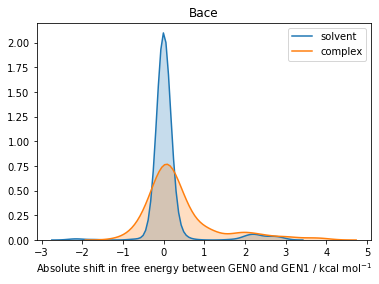

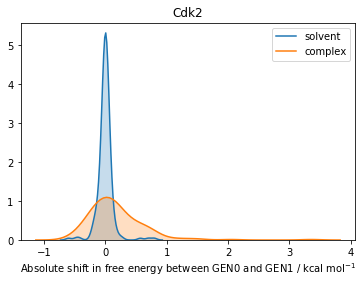

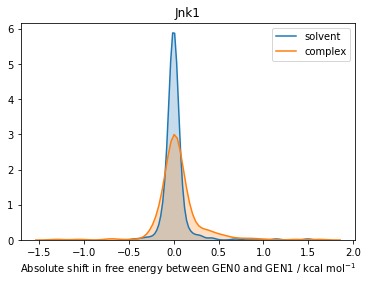

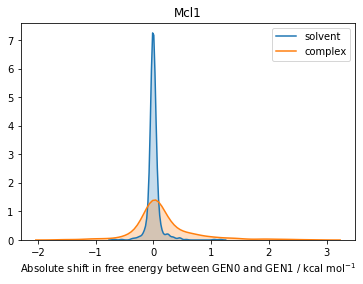

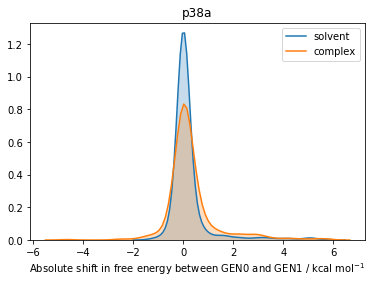

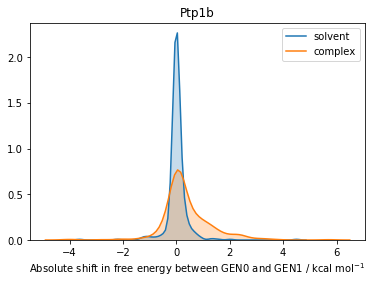

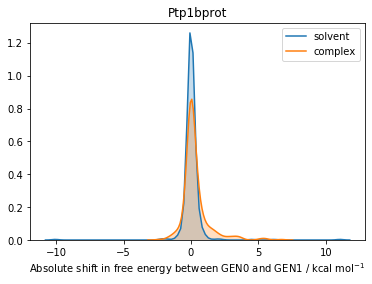

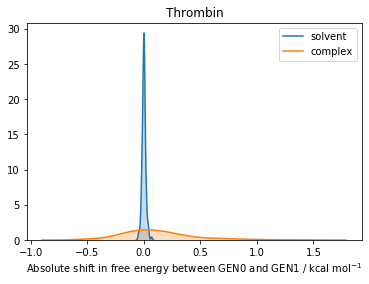

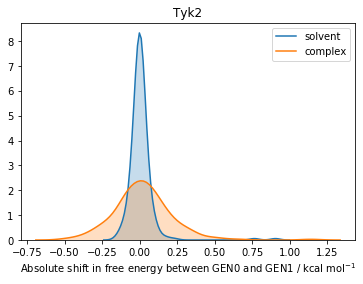

In [10]:
for x in diff_gens_sol:
    sns.kdeplot(diff_gens_sol[x], label=f'solvent' ,shade=True)
    sns.kdeplot(diff_gens_com[x], label=f'complex', shade=True)
    plt.title(x)
    plt.xlabel('Absolute shift in free energy between GEN0 and GEN1' +r' / kcal mol$^{-1}$')
    plt.show()


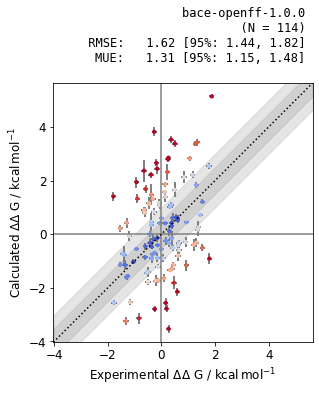

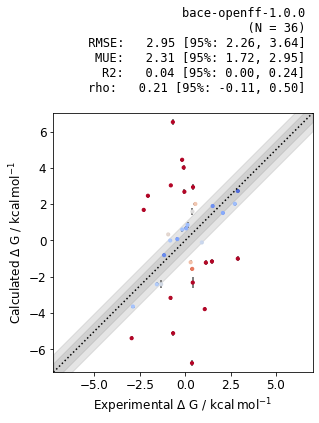

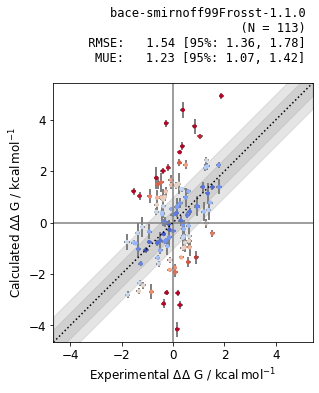

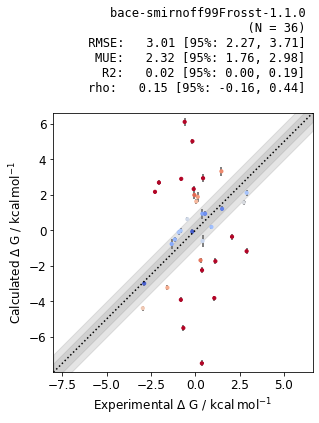

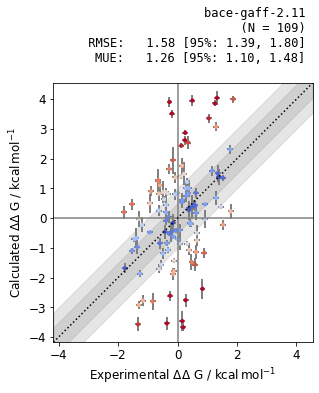

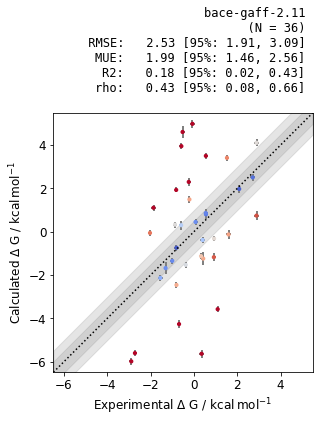

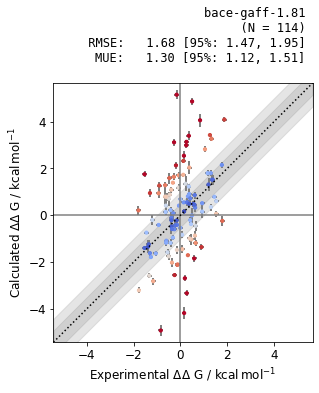

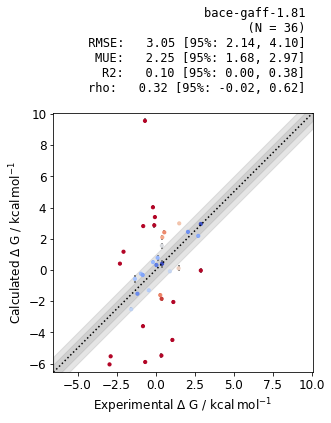

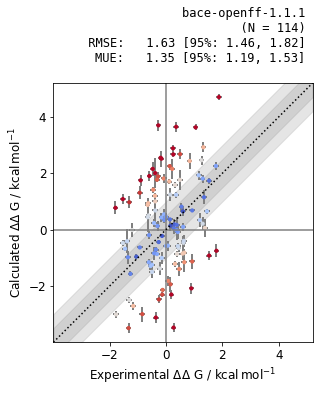

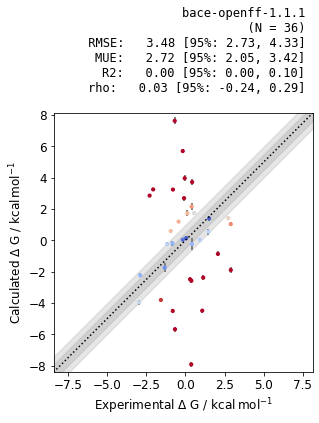

not enough results for bace-openff-1.2.0
not enough results for cdk2-openff-1.0.0
not enough results for cdk2-smirnoff99Frosst-1.1.0
not enough results for cdk2-gaff-2.11
not enough results for cdk2-gaff-1.81
not enough results for cdk2-openff-1.1.1
not enough results for cdk2-openff-1.2.0


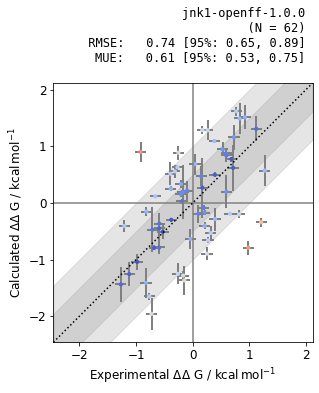

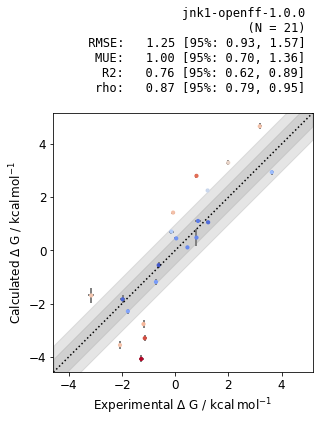

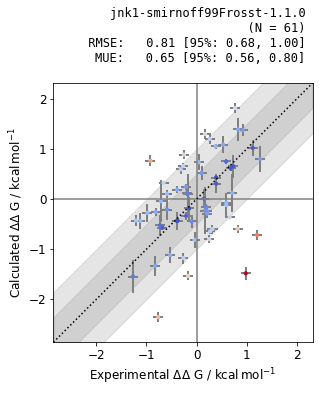

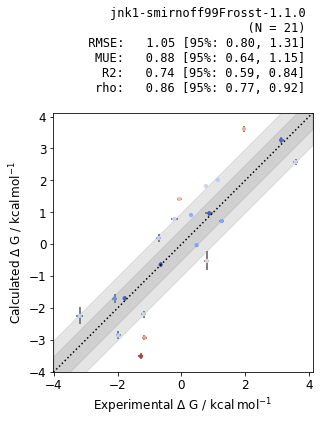

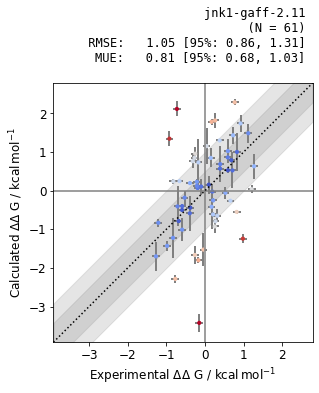

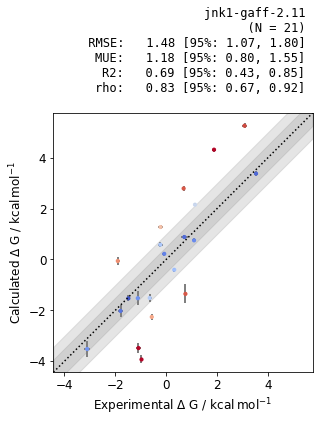

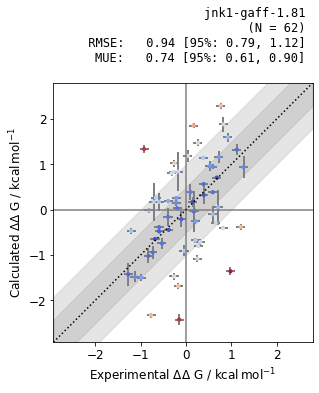

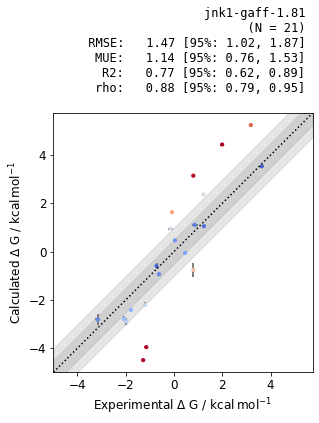

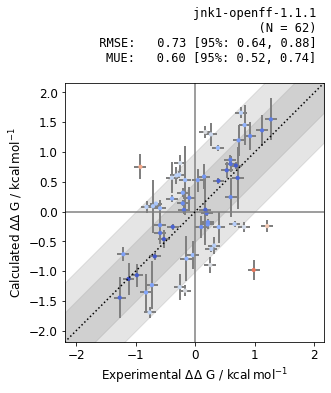

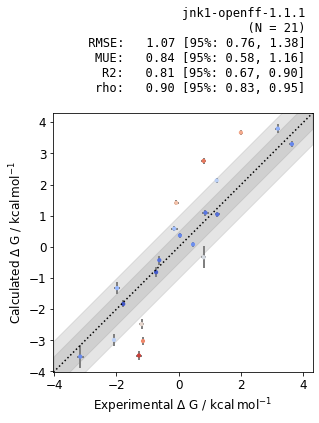

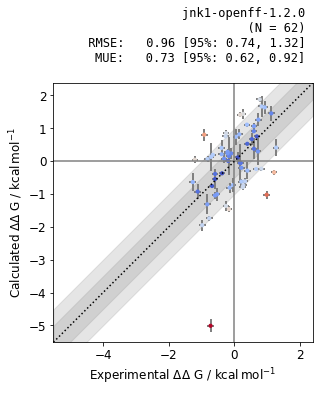

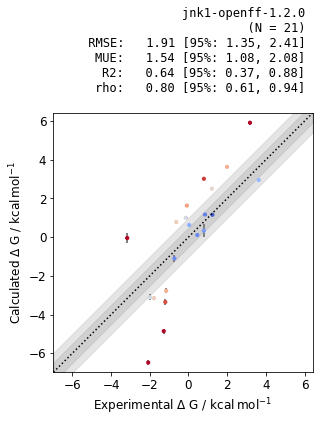

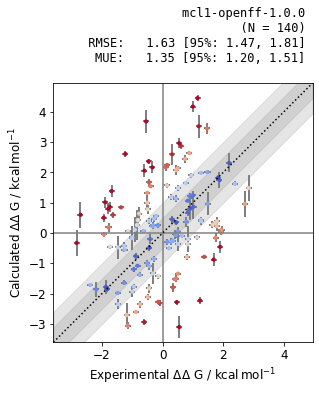

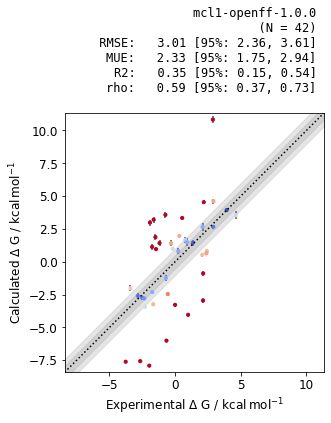

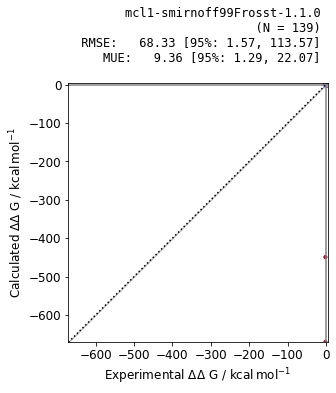

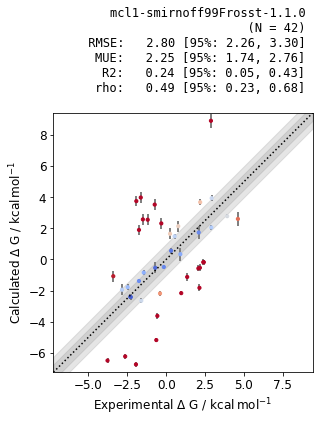

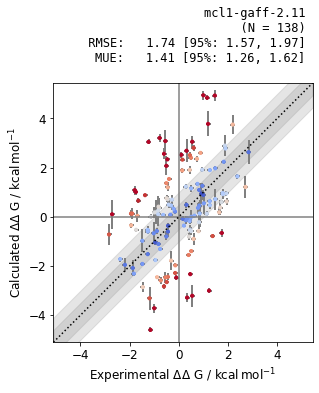

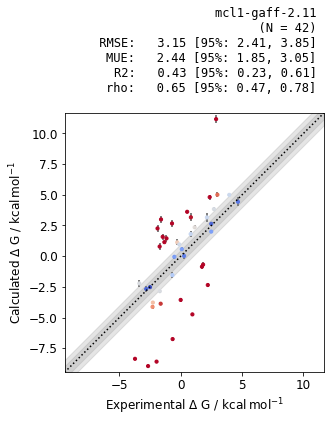

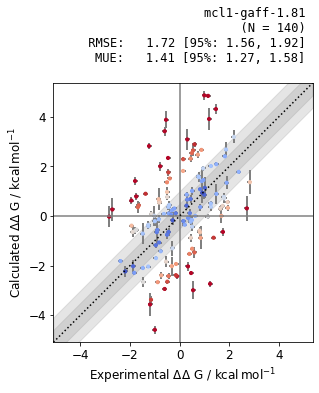

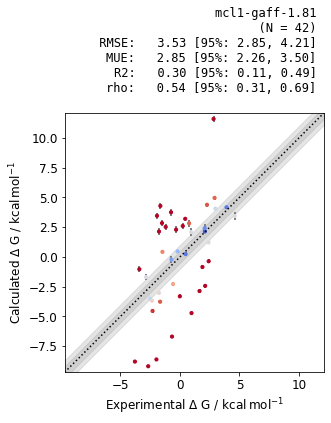

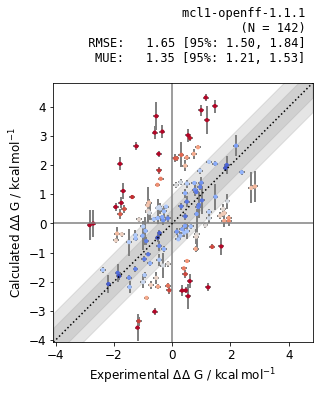

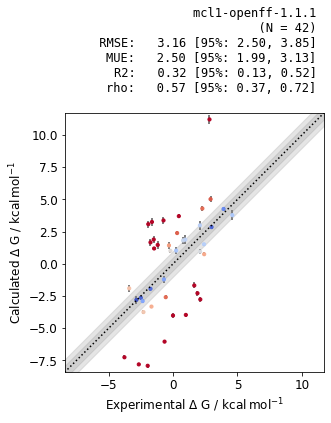

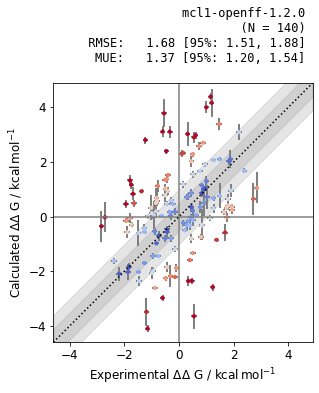

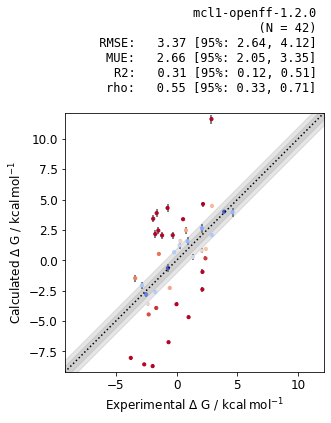

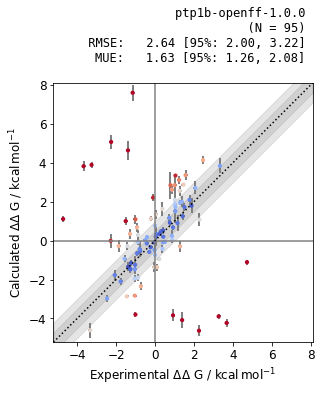

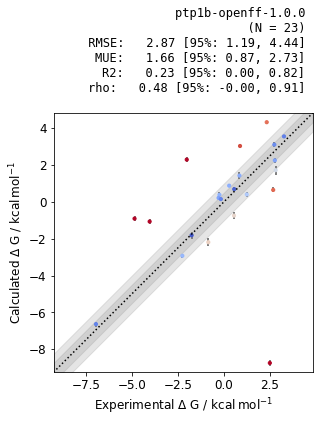

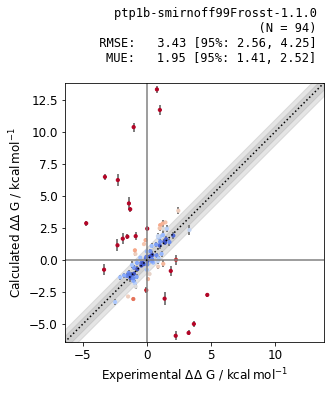

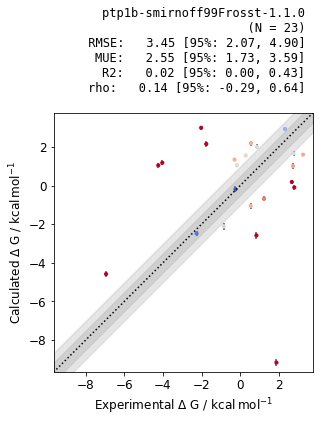

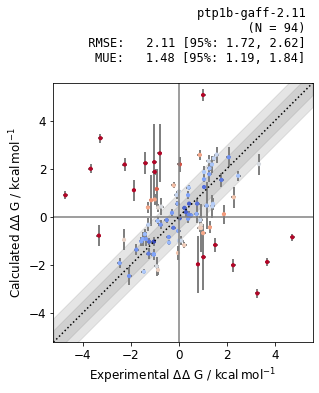

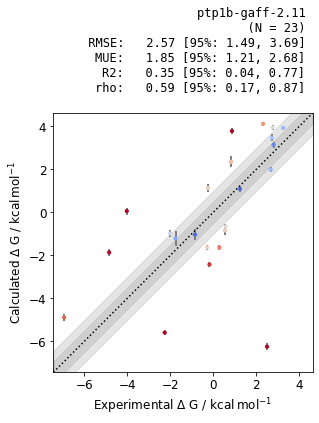

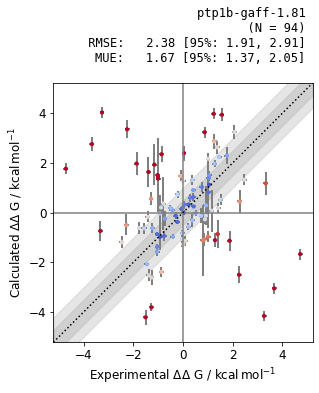

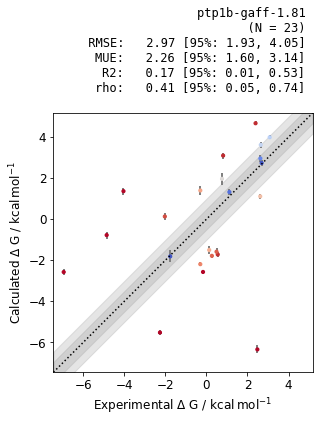

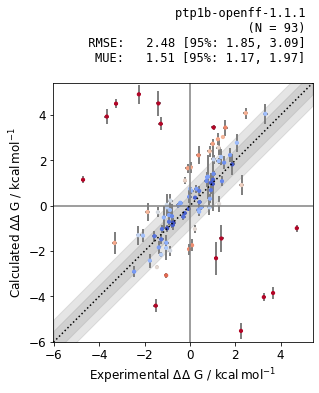

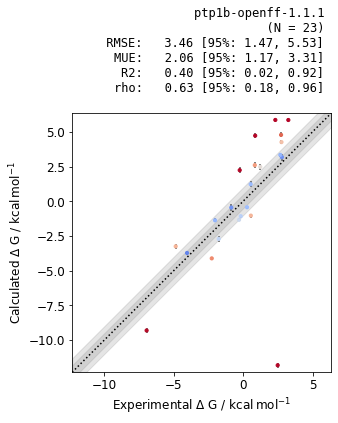

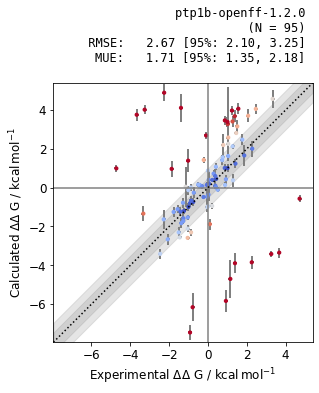

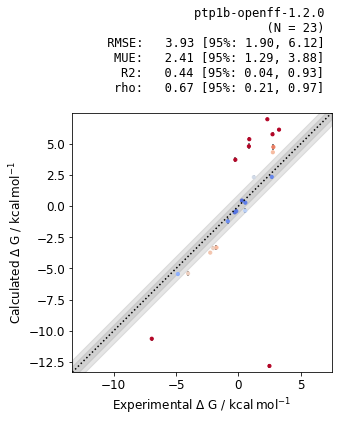

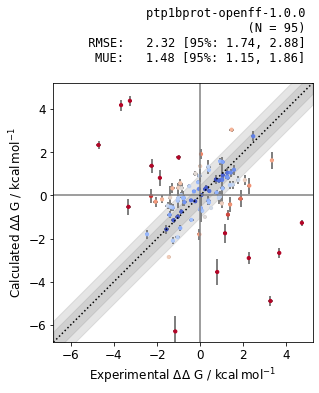

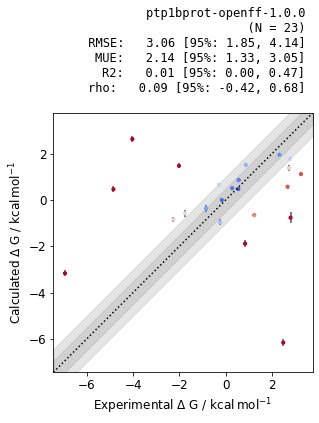

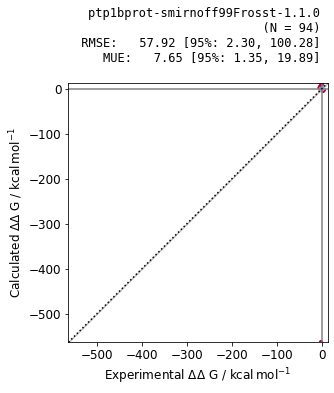

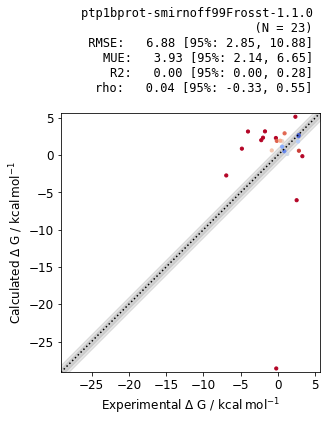

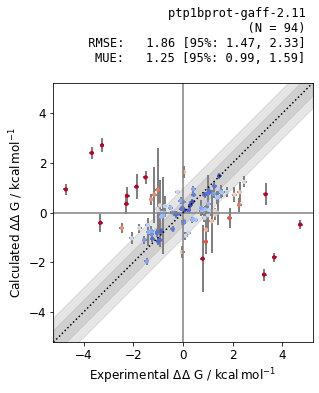

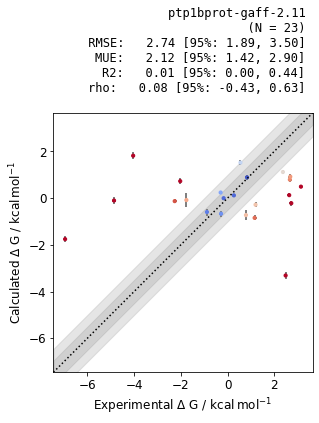

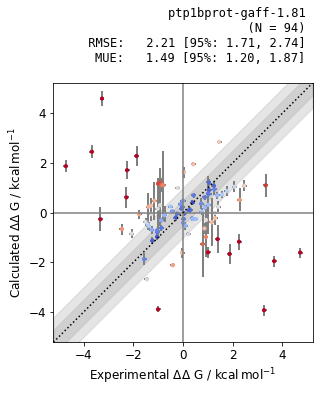

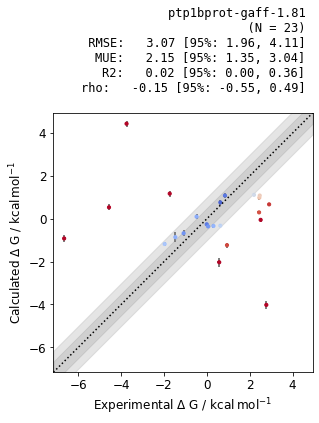

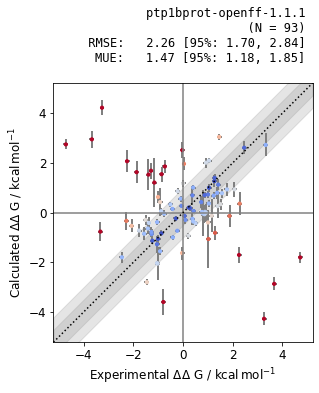

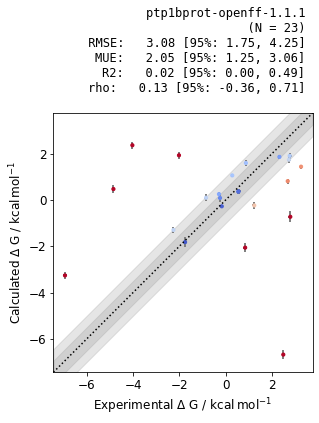

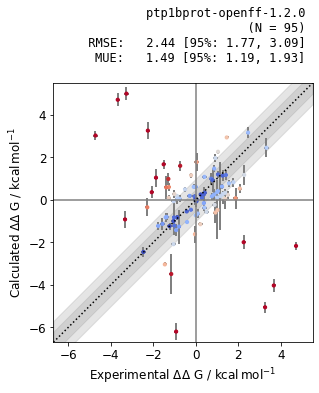

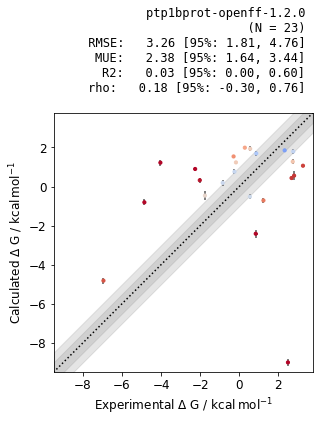

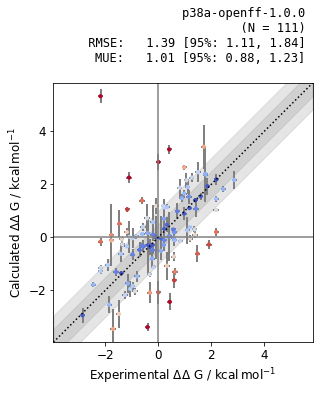

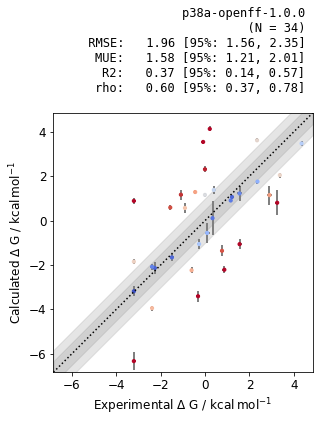

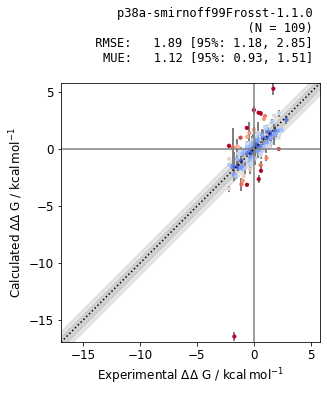

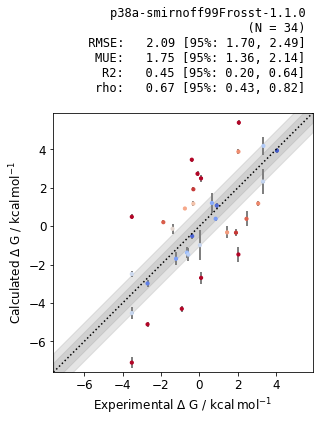

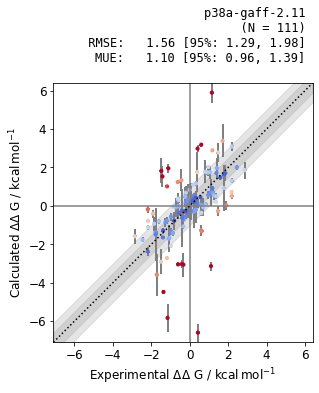

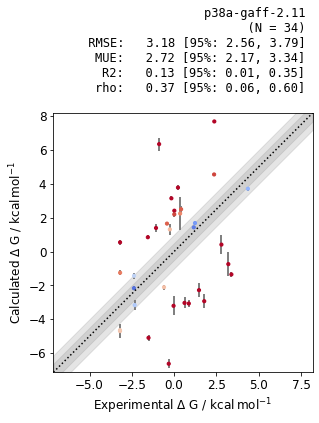

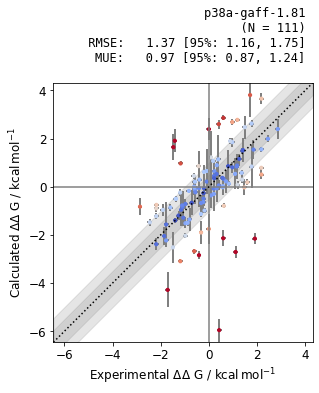

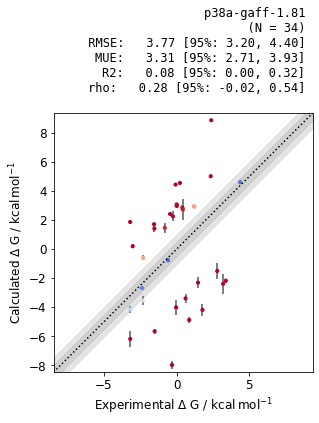

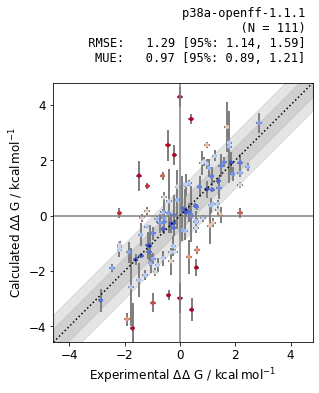

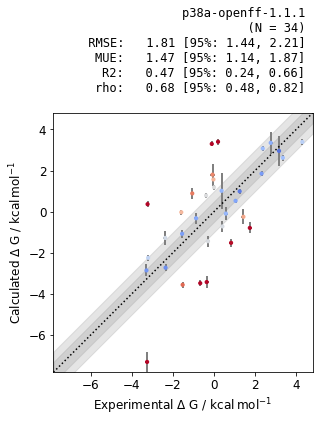

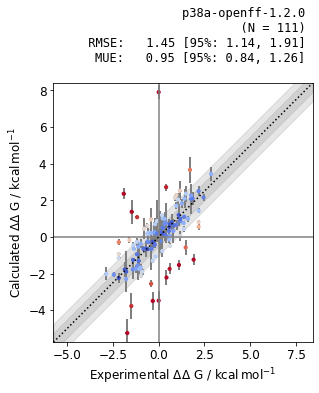

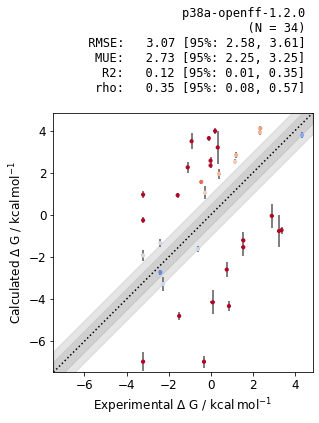

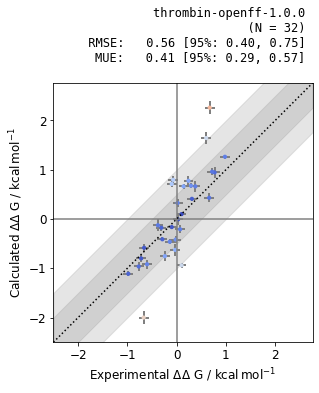

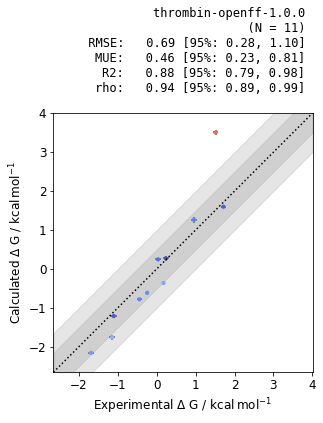

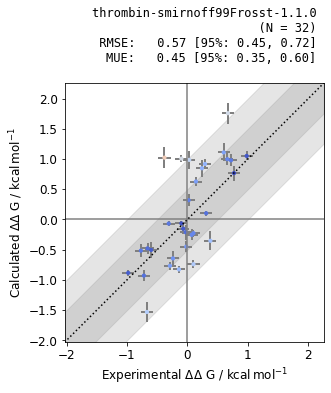

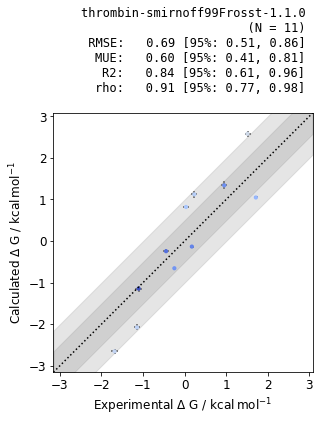

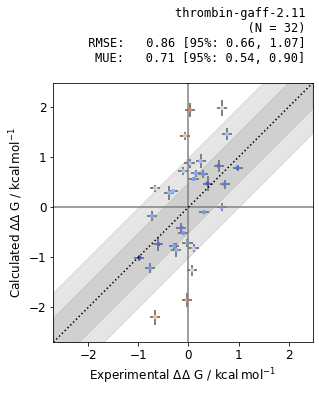

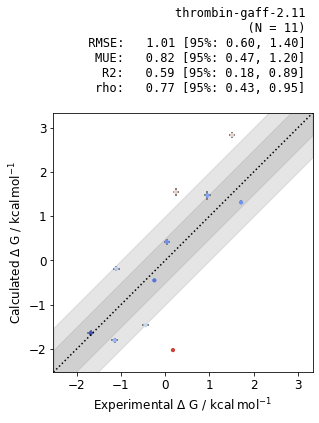

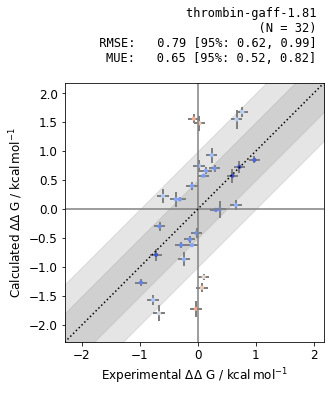

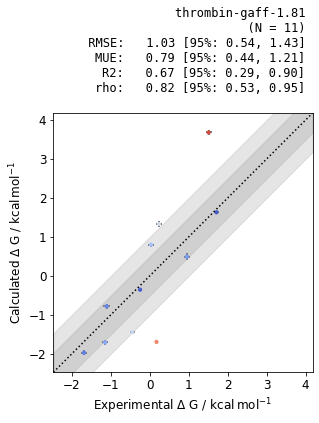

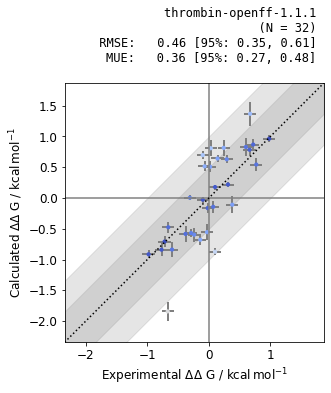

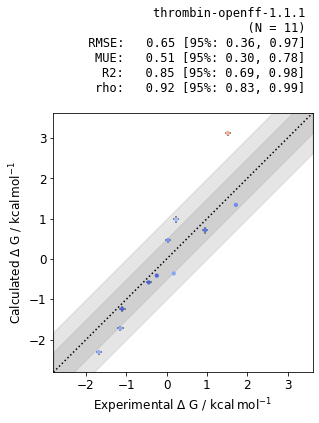

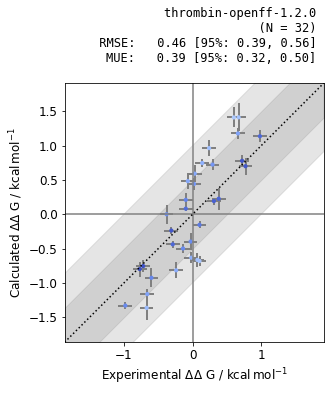

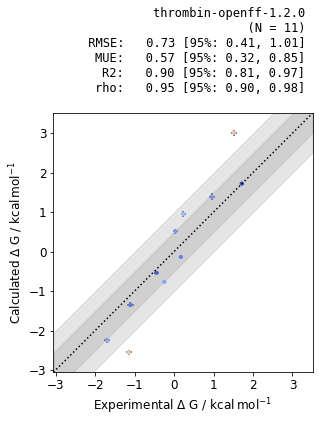

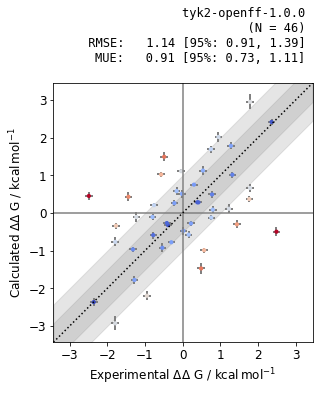

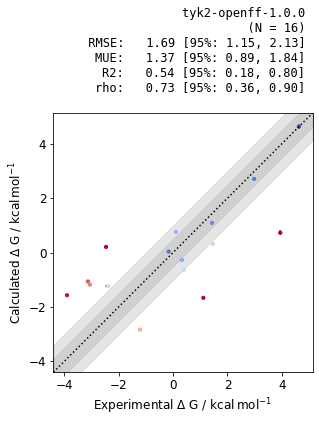

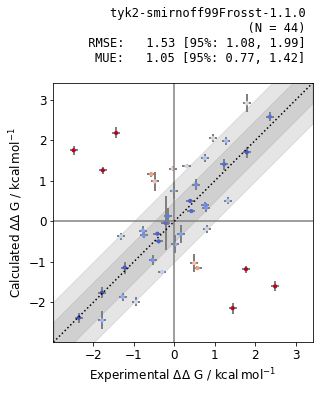

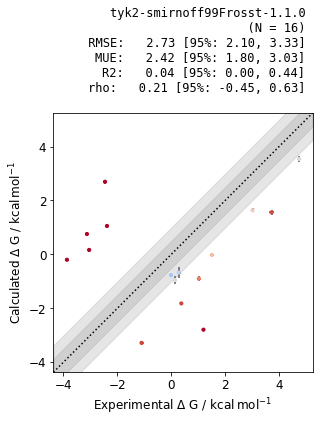

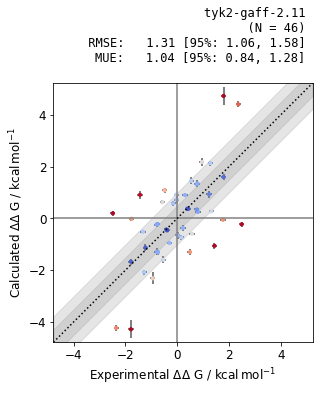

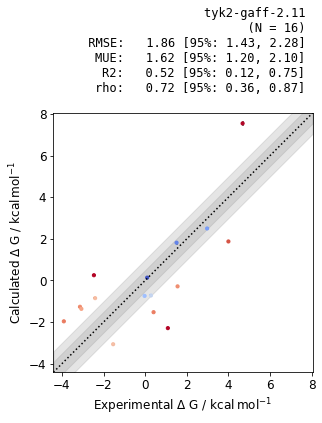

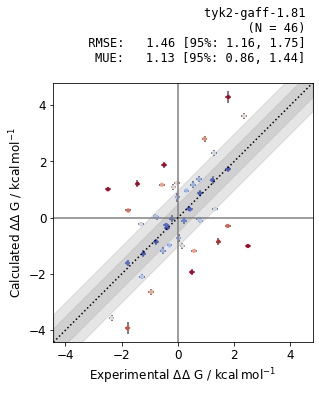

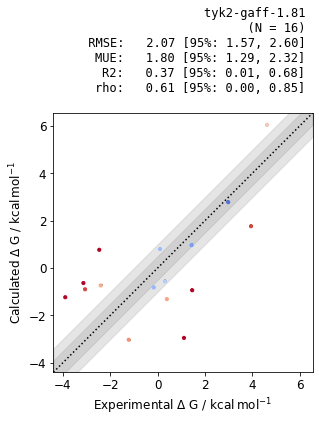

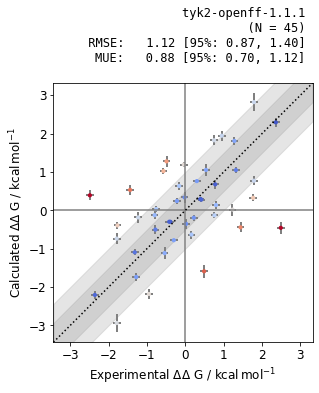

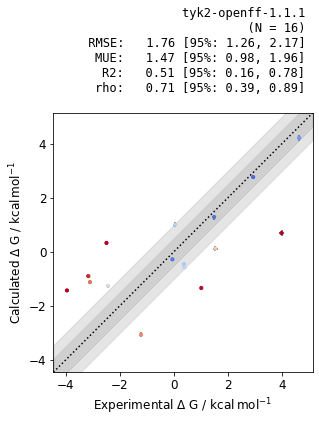

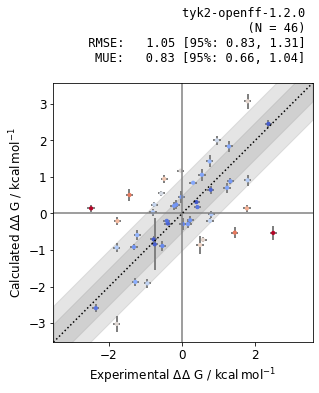

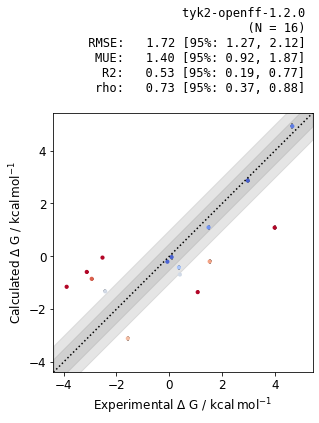

In [11]:
import networkx as nx
from freeenergyframework import plotting
graphs = {}
for p in order.keys():
    for ff in forcefields:
        g = nx.DiGraph()
        graphs[f'{p}-{ff}'] = g


for d in details.values():
    ff = d['ff']
    if 'complex_fes' in d and 'solvent_fes' in d:
#         print(ff)
        protein = d['target'].lower()
        graph = graphs[f'{protein}-{ff}']
        DDG = ((d['complex_fes'][0] - d['solvent_fes'][0])*kT).value_in_unit(unit.kilocalories_per_mole) 
        dDDG = ((d['solvent_fes'][1]**0.5 + d['complex_fes'][1]**0.5)**2*kT).value_in_unit(unit.kilocalories_per_mole)
        graph.add_edge(d['start'],d['end'],calc_DDG=DDG, calc_dDDG=dDDG,exp_DDG=d['expt'],exp_dDDG=0.1)

for proteinff in graphs.keys():
    g = graphs[proteinff]
    try:
        generate_absolute_values(g)
        plotting.plot_DDGs(g,title=f'{proteinff}')
        plotting.plot_DGs(g,title=f'{proteinff}')
    except IndexError:
        print(f'not enough results for {proteinff}')

In [96]:
# def plot_statistics_results(graphs, statistic='RMSE'):
#     RESULTS = {}

#     for j, proteinff in enumerate(graphs.keys()):
#         g = graphs[proteinff]
#         xs = [edge[2]['exp_DDG'] for edge in g.edges(data=True)]
#         ys = [edge[2]['calc_DDG'] for edge in g.edges(data=True)]
#         s = stats.bootstrap_statistic(xs,ys, statistic=statistic)
#         RMSES[proteinff] = s

#     target_mean_RMSES = {}
# #     plt.hlines(0,-1,len(forcefields),color='k',linestyles=':')
#     for res in RMSES:
#         r = RMSES[res]
#         protein, ff = res.split('-', 1)
#         if protein not in target_mean_RMSES:
#             target_mean_RMSES[protein] = [r['mle']]
#         else:
#             target_mean_RMSES[protein].append(r['mle'])

#     for t in target_mean_RMSES:
#         target_mean_RMSES[t] = np.mean(target_mean_RMSES[t])

#     for res in RMSES:
#         r = RMSES[res]
#         protein, ff = res.split('-', 1)
#         x = forcefields.index(ff)+0.05*order[protein]
#         plt.scatter(x,r['mle'],color=color[protein])
#         plt.fill_between([x-0.025,x+0.025],r['low'],r['high'],color=color[protein],alpha=0.5)
#     plt.ylim(0., 3.)
#     plt.xlim(-0.5, len(forcefields))
#     plt.xticks(range(len(forcefields)),forcefields,rotation=90)
#     plt.ylabel(r'RMSE / kcal mol$^{-1}$')
#     plt.show()

# RMSE for DDGS for each ff and protein -- negative values means better than average

# now looking in shift in absolutes -- negative values means better than average

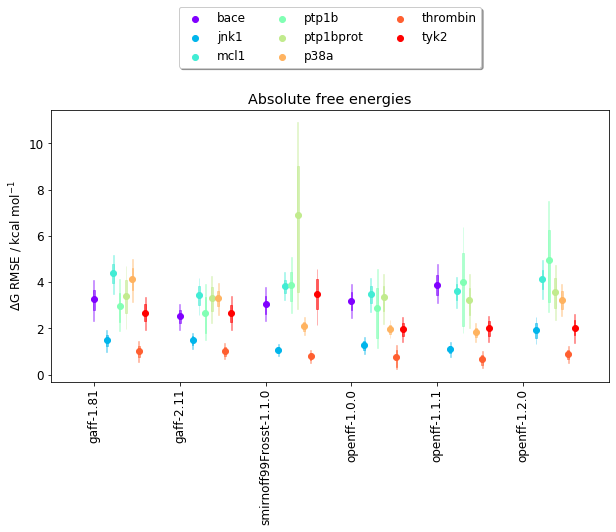

In [147]:
RESULTS = {}
pal = sns.color_palette(n_colors=len(order))

for j, proteinff in enumerate(graphs.keys()):
    g = graphs[proteinff]
    try:
        xs = [edge[1]['exp_DG'] for edge in g.nodes(data=True)]
        ys = [edge[1]['calc_DG'] for edge in g.nodes(data=True)]
        s = stats.bootstrap_statistic(xs,ys, statistic=statistic)
        s_68 = stats.bootstrap_statistic(xs,ys, statistic=statistic,ci=0.68)
        s['low68'] = s_68['low']
        s['high68'] = s_68['high']
        RESULTS[proteinff] = s
    except KeyError:
        continue

plt.figure(figsize=(10,5))
for res in RESULTS:
    r = RESULTS[res]
#     print(r)
    protein, ff = res.split('-', 1)
    x = forcefields.index(ff)+0.075*order[protein]
    if forcefields.index(ff) == 0:
        plt.scatter(x,r['mle'],color=color[protein],label=protein)
    else:
        plt.scatter(x,r['mle'],color=color[protein])
    plt.fill_between([x-0.005,x+0.005],r['low'],r['high'],color=color[protein],alpha=0.3)
    plt.fill_between([x-0.01,x+0.01],r['low68'],r['high68'],color=color[protein],alpha=0.5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4),
          ncol=3, fancybox=True, shadow=True)
# plt.ylim(-2, 2)
plt.xlim(-0.5, len(forcefields))
plt.xticks(range(len(forcefields)),forcefields,rotation=90)
plt.ylabel(r'ΔG RMSE / kcal mol$^{-1}$')
plt.title('Absolute free energies')
plt.show()

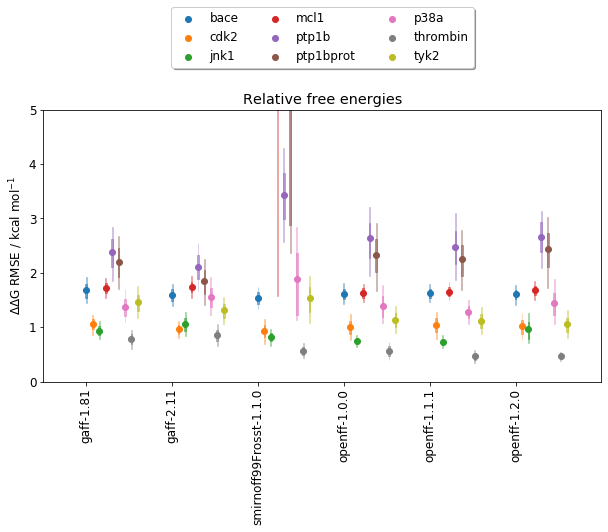

In [148]:
RESULTS = {}

for j, proteinff in enumerate(graphs.keys()):
    g = graphs[proteinff]
    try:
        xs = [edge[2]['exp_DDG'] for edge in g.edges(data=True)]
        ys = [edge[2]['calc_DDG'] for edge in g.edges(data=True)]
        s = stats.bootstrap_statistic(xs,ys, statistic=statistic)
        s_68 = stats.bootstrap_statistic(xs,ys, statistic=statistic,ci=0.68)
        s['low68'] = s_68['low']
        s['high68'] = s_68['high']
        RESULTS[proteinff] = s
    except KeyError:
        continue


plt.figure(figsize=(10,5))
for res in RESULTS:
    r = RESULTS[res]
#     print(r)
    protein, ff = res.split('-', 1)
    i = forcefields.index(ff)
    x = i+0.075*order[protein]
    c = pal[order[protein]]
    if forcefields.index(ff) == 0:
        plt.scatter(x,r['mle'],color=c,label=protein)
    else:
        plt.scatter(x,r['mle'],color=c)
    plt.fill_between([x-0.005,x+0.005],r['low'],r['high'],color=c,alpha=0.3)
    plt.fill_between([x-0.01,x+0.01],r['low68'],r['high68'],color=c,alpha=0.5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4),
          ncol=3, fancybox=True, shadow=True)
plt.ylim(0, 5)
plt.xlim(-0.5, len(forcefields))
plt.xticks(range(len(forcefields)),forcefields,rotation=90)
plt.ylabel(r'ΔΔG RMSE / kcal mol$^{-1}$')
plt.title('Relative free energies')
plt.show()

### NEQ inverting ligand indicies
Running the same pair of ligands, but changing the order should give an equal/opposite result (sign change accounted for).

Outliers are worrying, and could be for a range of reasons:
* Issues with set up - wrong orientation for sterically trapped molecules
* An issue with NEQ, which may be a convergence problem, unbinding events or BAR relying too heavily on a few trajectories

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launc

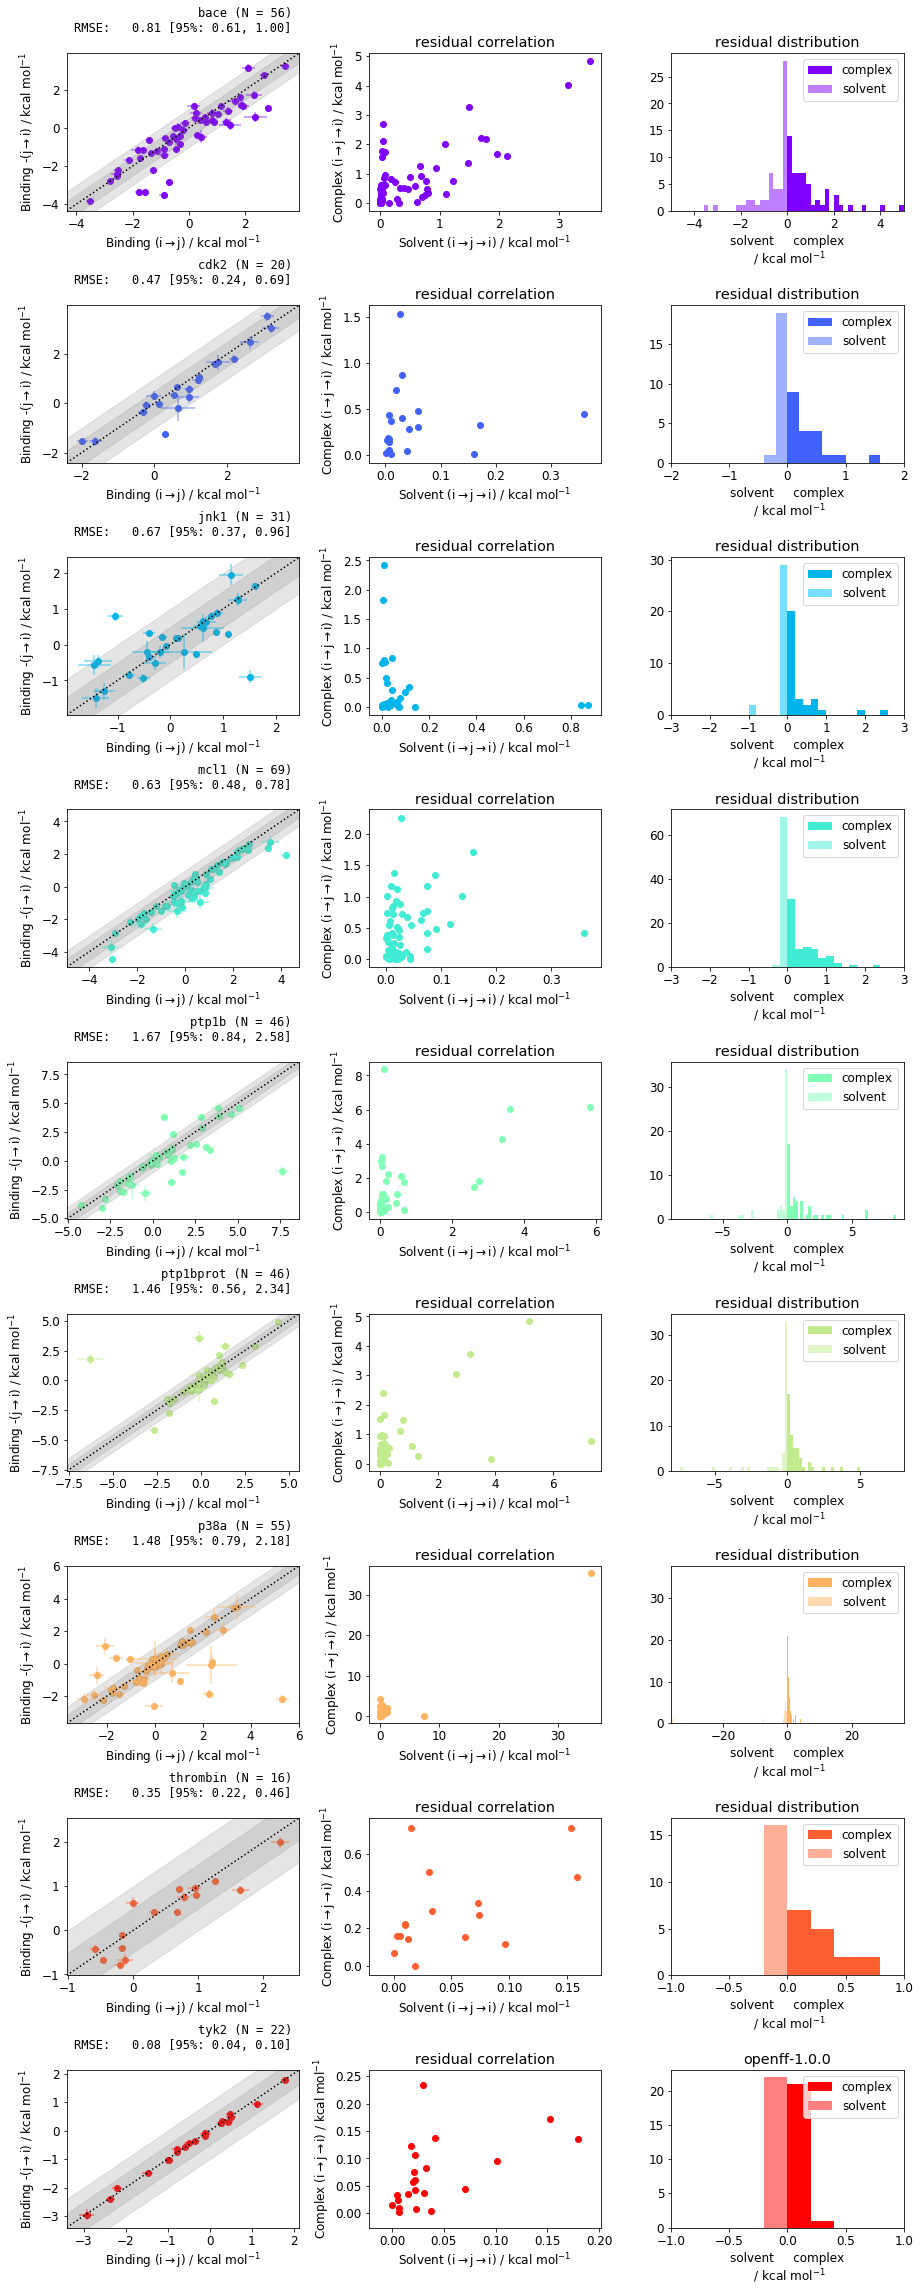

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launc

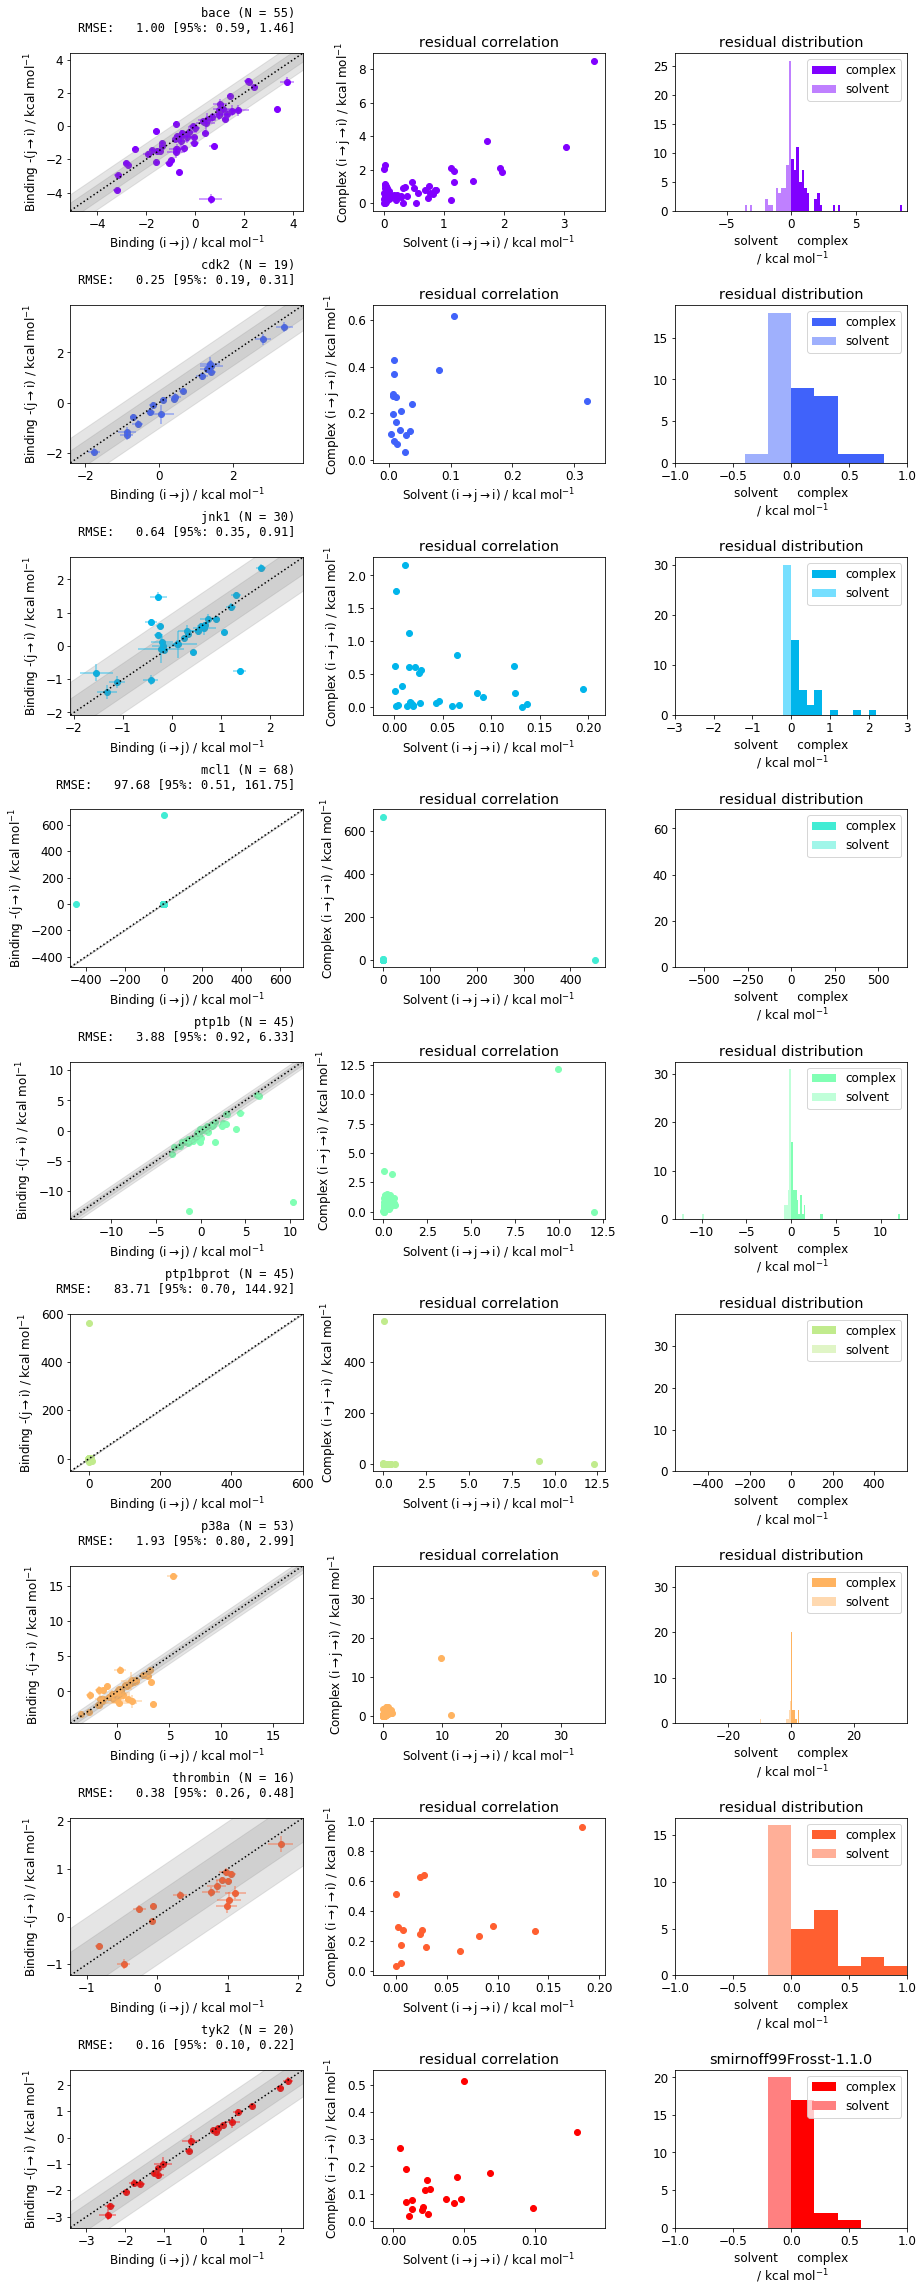

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launc

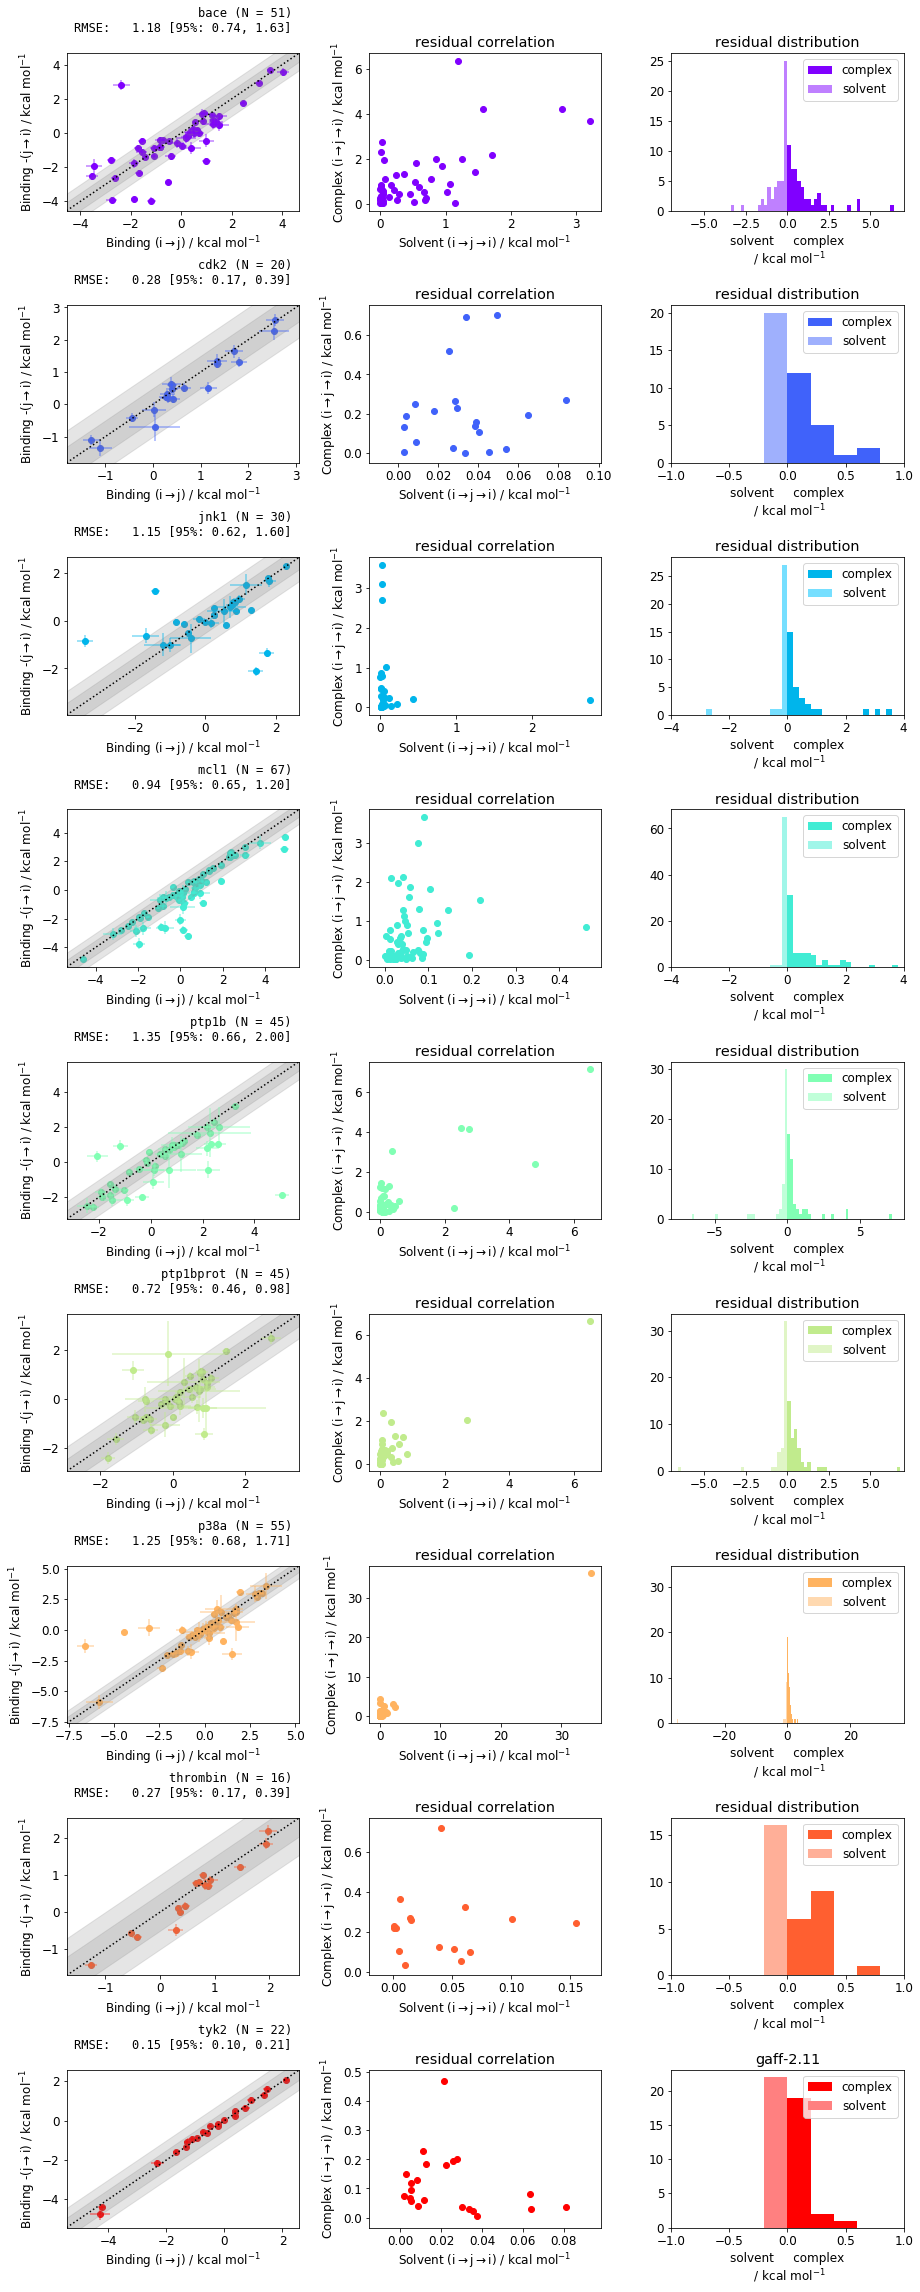

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launc

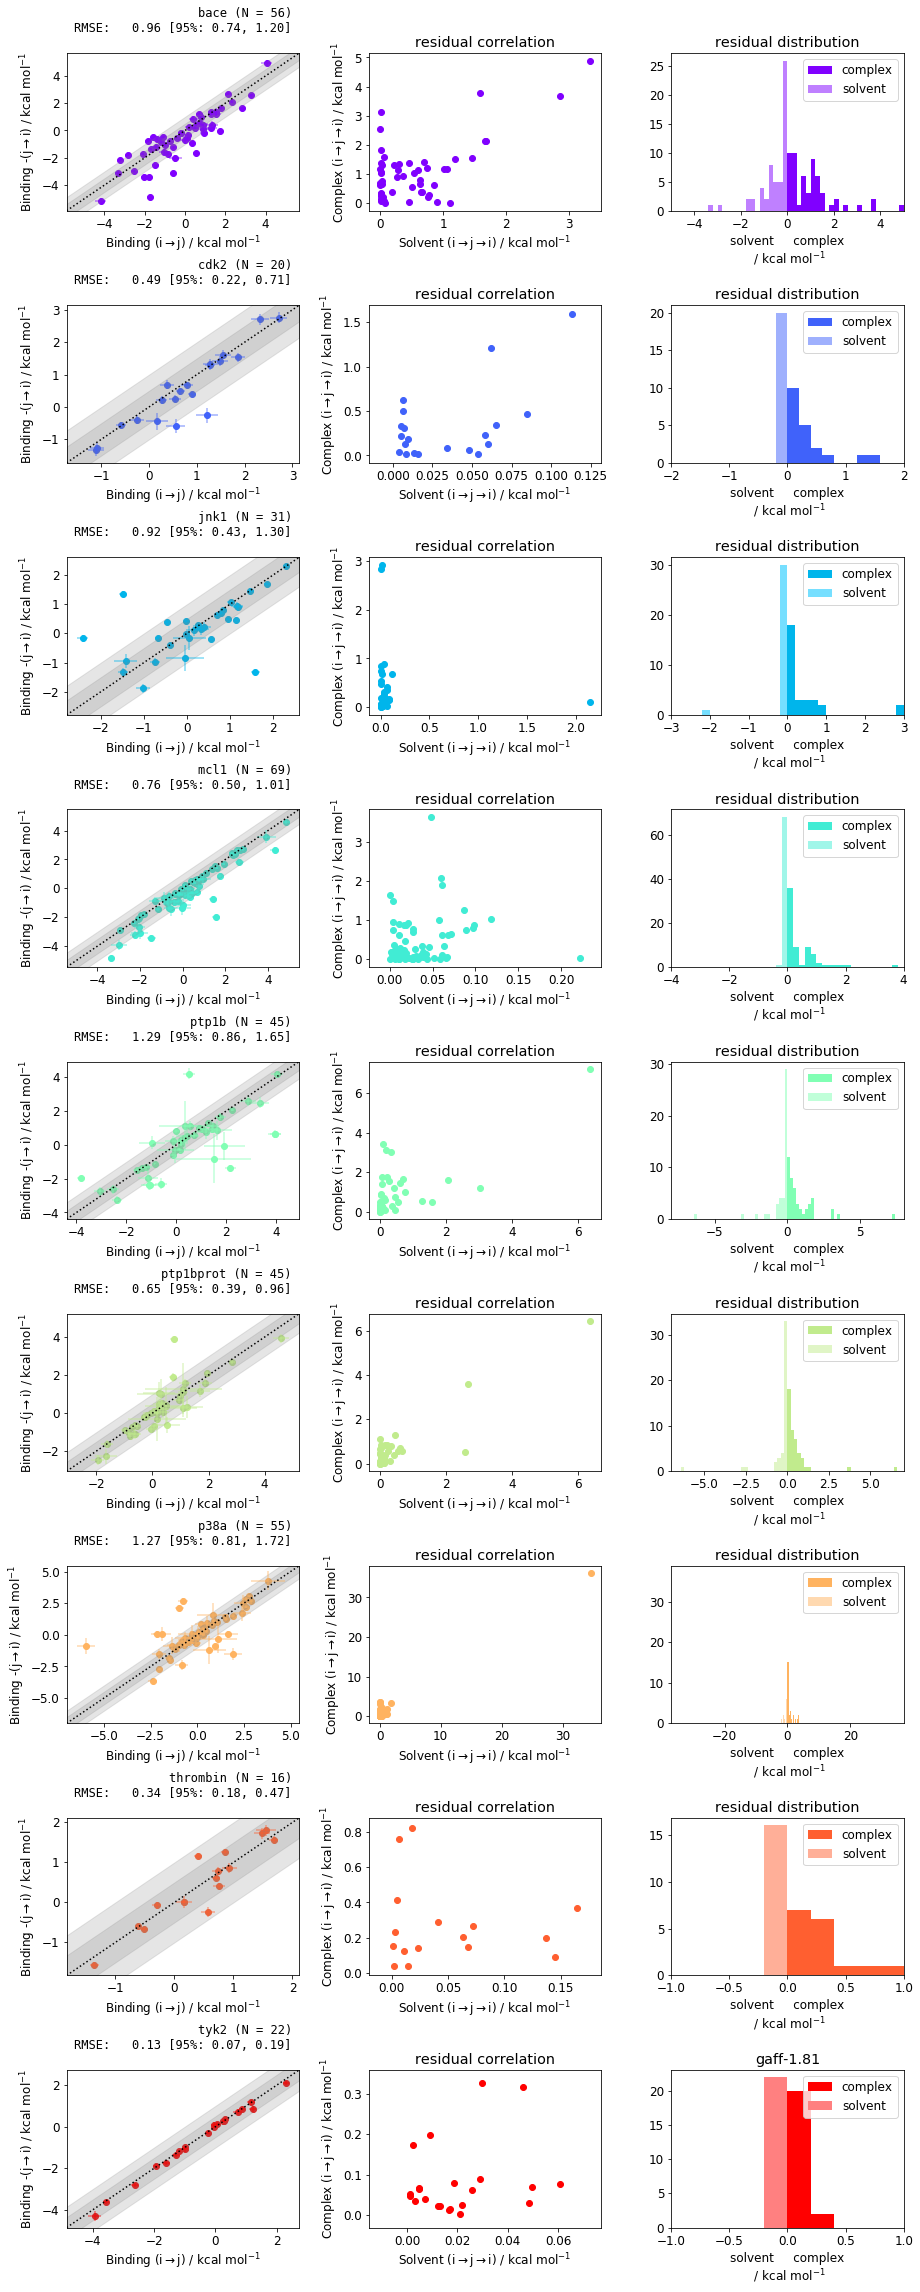

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

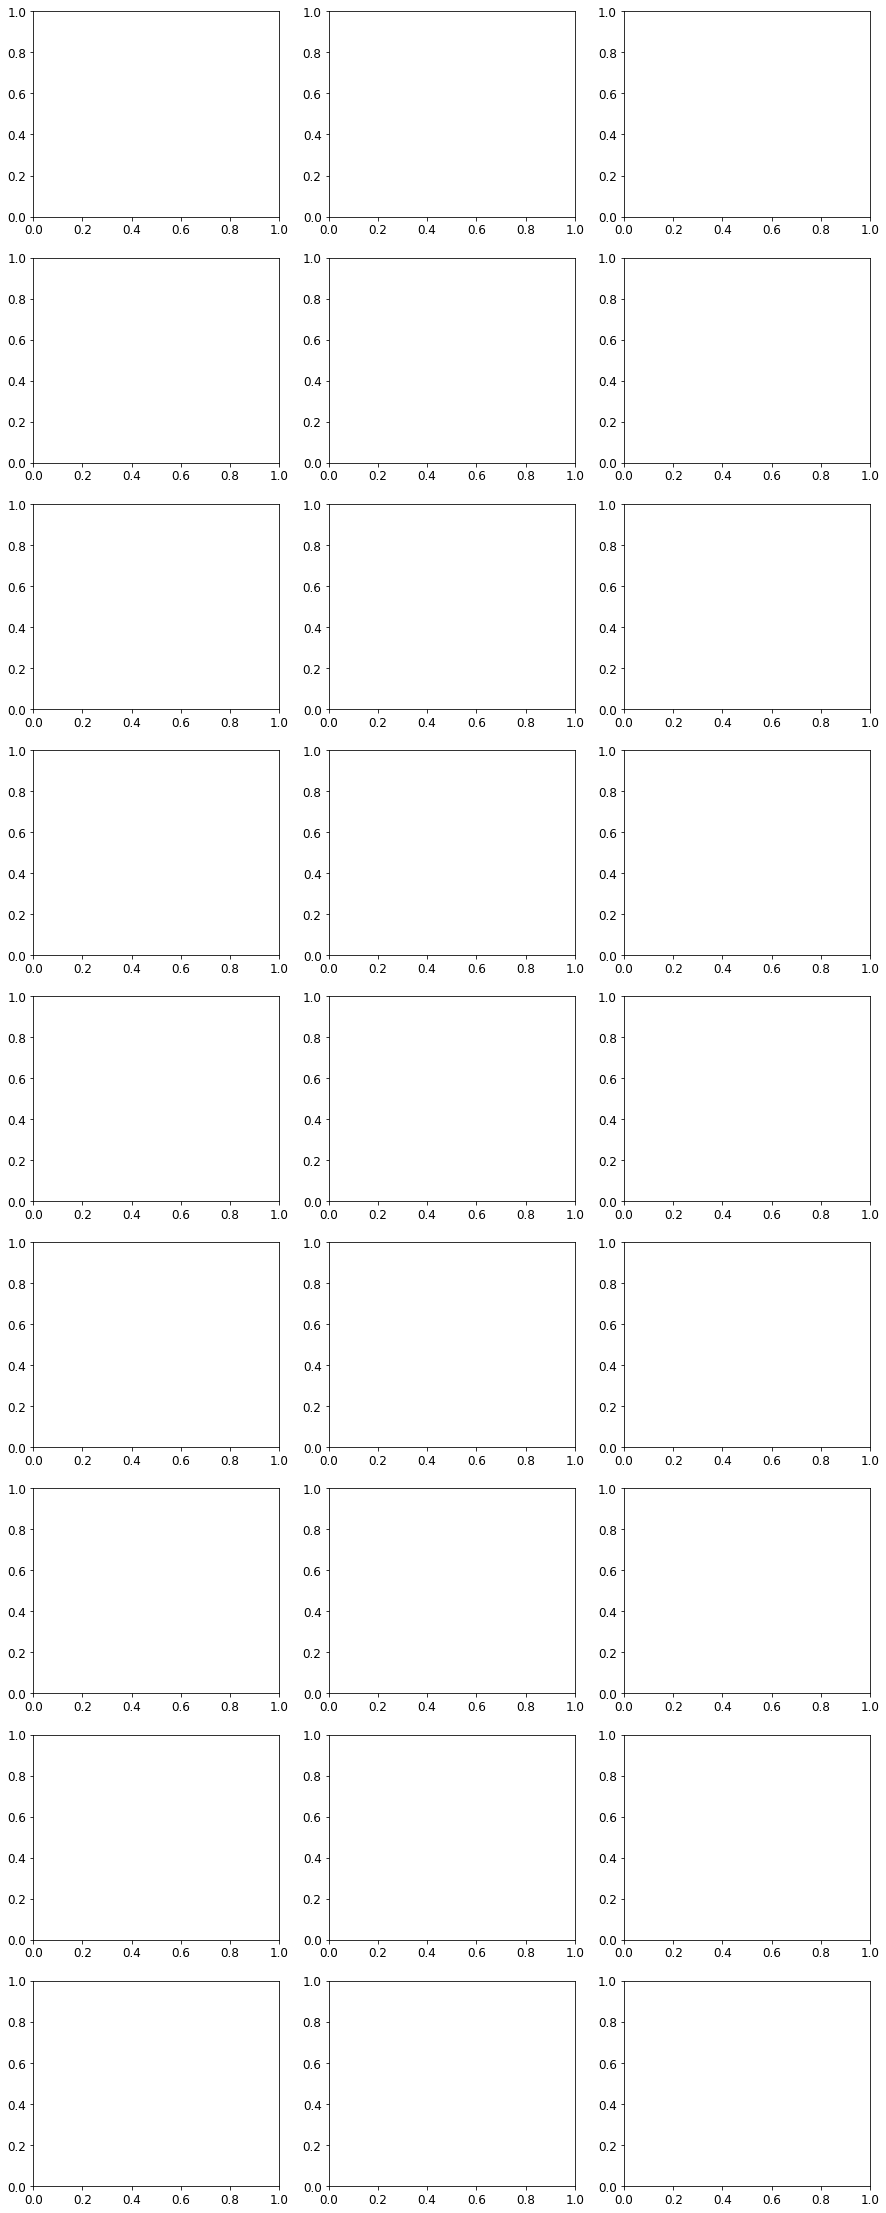

In [12]:
for ff in forcefields:

    fig, axes = plt.subplots(ncols=3,nrows=9,figsize=(15,40))
    residuals = {}
    consistency = {}
    for p in results.keys():
        residuals[p] = {'complex':[],'solvent':[]}
        consistency[p] = {'x':[],'y':[],'xerr':[],'yerr':[]}


    for i in range(1,3032,2):
        f = details[str(i)]
        r = details[str(i+1)]
        if f['ff'] != ff:
            continue
        if r['ff'] != ff:
            continue
        if 'complex_fes' in f and 'complex_fes' in r and 'solvent_fes' in f and 'solvent_fes' in r:
            protein = f['target'].lower()
            plot_id = order[protein]
            f_binding = ((f['complex_fes'][0] - f['solvent_fes'][0])*kT).value_in_unit(unit.kilocalories_per_mole)
            f_binding_err = ((f['solvent_fes'][1]**0.5 + f['complex_fes'][1]**0.5)**2*kT).value_in_unit(unit.kilocalories_per_mole)
            r_binding = ((r['complex_fes'][0] - r['solvent_fes'][0])*kT).value_in_unit(unit.kilocalories_per_mole)
            r_binding_err = ((r['solvent_fes'][1]**0.5 + r['complex_fes'][1]**0.5)**2*kT).value_in_unit(unit.kilocalories_per_mole)

            consistency[protein]['x'].append(f_binding)
            consistency[protein]['y'].append(-r_binding)
            consistency[protein]['xerr'].append(f_binding_err)
            consistency[protein]['yerr'].append(r_binding_err)

            axes[plot_id][0].errorbar(f_binding,-r_binding,xerr=f_binding_err,yerr=r_binding_err,color=color[protein],alpha=0.5)
            axes[plot_id][0].scatter(f_binding,-r_binding,color=color[protein])

            residuals[protein]['complex'].append(np.abs(((f['complex_fes'][0] + r['complex_fes'][0])*kT).value_in_unit(unit.kilocalories_per_mole)))
            residuals[protein]['solvent'].append(-np.abs(((f['solvent_fes'][0] + r['solvent_fes'][0])*kT).value_in_unit(unit.kilocalories_per_mole)))

    for key in order:
        statistics_string = ''
        for statistic in ['RMSE']:
            s = stats.bootstrap_statistic(np.asarray(consistency[key]['x']),np.asarray(consistency[key]['y']), statistic=statistic)
            string = f"{statistic}:   {s['mle']:.2f} [95%: {s['low']:.2f}, {s['high']:.2f}] " + "\n"
            statistics_string += string

        long_title = f'{key} (N = {len(np.asarray(consistency[key]["x"]))}) \n'+f'{statistics_string}'
        axes[order[key]][0].set_title(long_title, fontsize=12, loc='right', horizontalalignment='right', family='monospace')
        axes[order[key]][0].set_xlabel(r'Binding (i$\rightarrow$j) / kcal mol$^{-1}$')
        axes[order[key]][0].set_ylabel(r'Binding -(j$\rightarrow$i) / kcal mol$^{-1}$')
        axes[order[key]][1].scatter(-np.asarray(residuals[key]['solvent']),np.asarray(residuals[key]['complex']),color=color[key])
        axes[order[key]][1].set_title('residual correlation') 
        axes[order[key]][1].set_xlabel(r'Solvent (i$\rightarrow$j$\rightarrow$i) / kcal mol$^{-1}$') 
        axes[order[key]][1].set_ylabel(r'Complex (i$\rightarrow$j$\rightarrow$i) / kcal mol$^{-1}$') 

        xlimit = axes[order[key]][0].get_xlim()
        ylimit = axes[order[key]][0].get_ylim()
        limit = (min([xlimit[0],ylimit[0]]),max([xlimit[1],ylimit[1]]))
        axes[order[key]][0].plot(limit,limit, 'k:')
        small_dist = 0.5
        # plots grey region around x=y line
        axes[order[key]][0].fill_between(limit, [limit[0] - small_dist, limit[1] - small_dist],
                         [limit[0] + small_dist, limit[1] + small_dist],
                         color='grey', alpha=0.2)
        axes[order[key]][0].fill_between(limit, [limit[0] - small_dist*2, limit[1] - small_dist*2],
                         [limit[0] + small_dist*2, limit[1] + small_dist*2],
                         color='grey', alpha=0.2)
        axes[order[key]][0].set_xlim(limit)
        axes[order[key]][0].set_ylim(limit)

        minimum = np.floor(min(residuals[key]['solvent']))
        maximum = np.ceil(max(residuals[key]['complex']))
        bins = np.linspace(minimum,maximum,5*(maximum-minimum)+1)
        axes[order[key]][2].hist(residuals[key]['complex'],bins=bins,label='complex',color=color[key])
        axes[order[key]][2].hist(residuals[key]['solvent'],bins=bins,label='solvent',color=lighten_color(color[key],0.5))    
        axes[order[key]][2].legend()
        axes[order[key]][2].set_xlabel('solvent     complex\n'+r' / kcal mol$^{-1}$') 
        axes[order[key]][2].set_title('residual distribution') 
        xlim = max([-minimum,maximum])
        axes[order[key]][2].set_xlim(-xlim, xlim)

    plt.subplots_adjust(hspace = 0.6,wspace = 0.3)
    plt.title(ff)
    plt.show()


In [ ]:

# cdk2_categories = {0:'g',1:'g',2:'g',3:'g',4:'B',5:'BC',6:'B',7:'B',8:'B',9:'g',10:'g' ,11:'g' ,12:'C',13:'B',14:'B',15:'g'}

# def symmetry_assesment(protein_name, type_dict):
#     plt.figure(figsize=(5,5))
#     xs = []
#     ys = []
#     for i in range(1,660,2):
#         f = details[str(i)]
#         r = details[str(i+1)]
#         if 'complex_fes' in f and 'complex_fes' in r and 'solvent_fes' in f and 'solvent_fes' in r:
#             protein = f['protein'].split('_')[0].lower()
#             if protein != protein_name:
#                 continue
#             plot_id = order[protein]
#             f_binding = ((f['complex_fes'][0] - f['solvent_fes'][0])*kT).value_in_unit(unit.kilocalories_per_mole)
#             f_binding_err = ((f['solvent_fes'][1]**0.5 + f['complex_fes'][1]**0.5)**2*kT).value_in_unit(unit.kilocalories_per_mole)
#             r_binding = ((r['complex_fes'][0] - r['solvent_fes'][0])*kT).value_in_unit(unit.kilocalories_per_mole)
#             r_binding_err = ((r['solvent_fes'][1]**0.5 + r['complex_fes'][1]**0.5)**2*kT).value_in_unit(unit.kilocalories_per_mole)
#             if type_dict[int(f['start'])] == type_dict[int(f['end'])]:
#                 color='green'
#                 xs.append(f_binding)
#                 ys.append(-r_binding)
#             else:
#                 color='gray'

#             plt.errorbar(f_binding,-r_binding,xerr=f_binding_err,yerr=r_binding_err,color=color,alpha=0.5)
#             plt.scatter(f_binding,-r_binding,color=color)
#     statistics_string  = ''          
#     for statistic in ['RMSE']:
#         s = stats.bootstrap_statistic(np.asarray(xs),np.asarray(ys), statistic=statistic)
#         string = f"{statistic}:   {s['mle']:.2f} [95%: {s['low']:.2f}, {s['high']:.2f}] " + "\n"
#         statistics_string += string

#     long_title = f'{protein_name} (N = {len(xs)}) \n'+f'{statistics_string}'
#     plt.title(long_title, fontsize=12, loc='right', horizontalalignment='right', family='monospace')
#     plt.xlabel(r'Binding (i$\rightarrow$j) / kcal mol$^{-1}$')
#     plt.ylabel(r'Binding -(j$\rightarrow$i) / kcal mol$^{-1}$')

#     xlimit = plt.xlim()
#     ylimit = plt.ylim()
#     limit = (min([xlimit[0],ylimit[0]]),max([xlimit[1],ylimit[1]]))
#     plt.plot(limit,limit, 'k:')
#     small_dist = 0.5
#     # plots grey region around x=y line
#     plt.fill_between(limit, [limit[0] - small_dist, limit[1] - small_dist],
#                      [limit[0] + small_dist, limit[1] + small_dist],
#                      color='grey', alpha=0.2)
#     plt.fill_between(limit, [limit[0] - small_dist*2, limit[1] - small_dist*2],
#                      [limit[0] + small_dist*2, limit[1] + small_dist*2],
#                      color='grey', alpha=0.2)
#     plt.xlim(limit)
#     plt.ylim(limit)

#     plt.show()
    
# # cdk2_categories = {0:'g',1:'g',2:'g',3:'g',4:'B',5:'BC',6:'B',7:'B',8:'B',9:'g',10:'g' ,11:'g' ,12:'C',13:'B',14:'B',15:'g'}
# # thrombin_categories = {0:'B',1:'B',2:'B',3:'B',4:'BD',5:'BD',6:'B',7:'g',8:'BD',9:'BD',10:'B'}
# # jnk1_categories = {0:'C',1:'BD',2:'B',3:'BD',4:'G',5:'G',6:'AC',7:'BD',8:'A',9:'BD',10:'BD',11:'BD',12:'BD',13:'G',14:'BD',15:'G',16:'BD',17:'D',18:'B',19:'AC',20:'B'}
# # bace_categories = {0:'B',1:'B',2:'G',3:'B',4:'bd',5:'B',6:'G',7:'B',8:'BC',9:'Bc',10:'B',11:'c',12:'B',13:'B',
# #                    14:'Bc',15:'Bc',16:'B',17:'c',18:'B',19:'Bc',20:'Bc',21:'B',22:'Bc',23:'B',24:'Bc',
# #                    25:'B',26:'Bc',27:'Bc',28:'G',29:'B',30:'B',31:'d',32:'Bc',33:'x',34:'y',35:'z'}


# # symmetry_assesment('cdk2',cdk2_categories)
# # # symmetry_assesment('thrombin',thrombin_categories)
# # symmetry_assesment('jnk1',jnk1_categories)
# # symmetry_assesment('bace',bace_categories)  

In [ ]:

# protein_per_lig = {}

# for p in results.keys():
#     protein_per_lig[p] = {}

# for i in range(1,660,2):
#     f = details[str(i)]
#     r = details[str(i+1)]
#     protein = f['target'].lower()
#     if 'complex_fes' in f and 'complex_fes' in r and 'solvent_fes' in f and 'solvent_fes' in r:
#         if f['start'] not in protein_per_lig[protein]:
#             protein_per_lig[protein][f['start']] = {'complex':[],'solvent':[],'binding':[]}
#         if f['end'] not in protein_per_lig[protein]:
#             protein_per_lig[protein][f['end']] = {'complex':[],'solvent':[],'binding':[]}
#         complex_residual = np.abs(((f['complex_fes'][0] + r['complex_fes'][0])*kT).value_in_unit(unit.kilocalories_per_mole))
#         solvent_residual = np.abs(((f['solvent_fes'][0] + r['solvent_fes'][0])*kT).value_in_unit(unit.kilocalories_per_mole))
#         protein_per_lig[protein][f['start']]['complex'].append(complex_residual)
#         protein_per_lig[protein][f['start']]['solvent'].append(solvent_residual)
#         protein_per_lig[protein][f['end']]['complex'].append(complex_residual)
#         protein_per_lig[protein][f['end']]['solvent'].append(solvent_residual)

        
# fig, axes = plt.subplots(ncols=1,nrows=9,figsize=(15,40))

# for protein in order:
#     ligs = []
#     plotting_complex = []
#     plotting_solvent = []
#     for l in sorted(protein_per_lig[protein]):
#         ligs.append(l)
#         plotting_complex.append(protein_per_lig[protein][l]['complex'])
#         plotting_solvent.append(protein_per_lig[protein][l]['solvent'])
#     bp = axes[order[protein]].boxplot(plotting_complex, patch_artist=True,positions=np.array(range(len(plotting_complex)))*2.0-0.2, sym='', widths=0.3)
# ###### mess around with colours #######
#     for box in bp['boxes']:
#         box.set(color=lighten_color(color[protein],1.5))
#         box.set(facecolor=color[protein])
#     for whisker in bp['whiskers']:
#         whisker.set(color=lighten_color(color[protein],1.5))
#     for cap in bp['caps']:
#         cap.set(color=lighten_color(color[protein],1.5))
#     for median in bp['medians']:
#         median.set(color=lighten_color(color[protein],0.5))
# ##############
#     bp = axes[order[protein]].boxplot(plotting_solvent, patch_artist=True,positions=np.array(range(len(plotting_solvent)))*2.0+0.2, sym='', widths=0.3)
# ###### mess around with colours #######
#     for box in bp['boxes']:
#         box.set(color=lighten_color(color[protein],1.5))
#         box.set(facecolor=lighten_color(color[protein],0.5))
#     for whisker in bp['whiskers']:
#         whisker.set(color=lighten_color(color[protein],1.5))
#     for cap in bp['caps']:
#         cap.set(color=lighten_color(color[protein],1.5))
#     for median in bp['medians']:
#         median.set(color=color[protein])

#     ylimit = axes[order[protein]].get_ylim()
#     pos = np.array(range(len(plotting_solvent)))*2.0
#     upper_labels = [len(x) for x in plotting_complex]
#     for tick, label in zip(range(len(ligs)), axes[order[protein]].get_xticklabels()):
#         axes[order[protein]].text(pos[tick], ylimit[1]*0.9, upper_labels[tick],
#                  horizontalalignment='center', size='small')
# ##############
#     axes[order[protein]].set_xticks(range(0, len(ligs) * 2, 2))
#     axes[order[protein]].set_xticklabels(ligs)
#     axes[order[protein]].set_title(protein)
#     axes[order[protein]].set_ylabel(r'per-ligand residuals / kcal mol$^{-1}$')
#     axes[order[protein]].set_xlabel('Ligand index')
#     hB, = axes[order[protein]].plot([1,1],color=color[protein])
#     hR, = axes[order[protein]].plot([1,1],color=lighten_color(color[protein],0.5))
#     axes[order[protein]].legend((hB, hR),('Complex', 'Solvent'),loc='best')
#     hB.set_visible(False)
#     hR.set_visible(False)
# plt.subplots_adjust(hspace = 0.3)
# plt.show()

In [ ]:
ff_symbols = {'openff-1.0.0':'o','smirnoff99Frosst-1.1.0':'x','gaff-2.11':'^','gaff-1.81':'*','openff-1.2.0':'1'}

fig, axes = plt.subplots(ncols=len(ff_symbols),nrows=1,figsize=(len(ff_symbols)*5, 5))

results_var = {}
for p in ff_symbols.keys():
    results_var[p] = {'sol_s':[], 'com_s':[]}
for q, ff in enumerate(ff_symbols.keys()):
#     fig, axes = plt.subplots(ncols=len(forcefields),nrows=1,figsize=(5,45))

    for d in details.values():
        if d['ff'] == ff:
            if 'complex_fes' in d and 'solvent_fes' in d:
                protein = d['target'].lower()
                if protein == 'jnk1':
                    results_var[ff]['sol_s'].append(d['solvent_fes'][1] * d['n_solvent'])
                    results_var[ff]['com_s'].append(d['complex_fes'][1]* d['n_complex'])
                    axes[q].scatter(np.log10(d['solvent_fes'][1] * d['n_solvent']),np.log10(d['complex_fes'][1]* d['n_complex']),color=color[protein],marker=ff_symbols[d['ff']])

for q,p in enumerate(results_var.keys()):
    r = results_var[p]
    statistics_string = ''
    for statistic in ['R2','rho']:
        s = stats.bootstrap_statistic(np.asarray(r['sol_s']),np.asarray(r['com_s']), statistic=statistic)
        string = f"{statistic}:   {s['mle']:.2f} [95%: {s['low']:.2f}, {s['high']:.2f}] " + "\n"
        statistics_string += string

    long_title = f'{p} (N = {len(np.asarray(r["sol_s"]))}) \n {statistics_string}'
    axes[q].set_title(long_title, fontsize=12, loc='right', horizontalalignment='right', family='monospace')
    axes[q].set_xlabel(r'log$_{10}$(s$_{solvent}$) / kcal mol$^{-1}$')
    axes[q].set_ylabel(r'log$_{10}$(s$_{complex}$) / kcal mol$^{-1}$')
# plt.subplots_adjust(hspace = 0.5) 
plt.show()

In [ ]:
ff_symbols = {'openff-1.0.0':'o','smirnoff99Frosst-1.1.0':'x','gaff-2.11':'^','gaff-1.81':'*','openff-1.1.1':'1','openff-1.2.0':'v'}

fig, axes = plt.subplots(ncols=len(forcefields),nrows=9,figsize=(30,45))

for q, ff in enumerate(forcefields):
    results_var = {}

    for p in results.keys():
        results_var[p] = {'sol_s':[], 'com_s':[]}

    for d in details.values():
        if d['ff'] == ff:
            if 'complex_fes' in d and 'solvent_fes' in d:
                protein = d['target'].lower()
                if protein
                plot_id = order[protein]
                print(plot_id)
                results_var[protein]['sol_s'].append(d['solvent_fes'][1] * d['n_solvent'])
                results_var[protein]['com_s'].append(d['complex_fes'][1]* d['n_complex'])
                axes[plot_id,q].scatter(-np.log10(d['solvent_fes'][1] * d['n_solvent']),-np.log10(d['complex_fes'][1]* d['n_complex']),color=color[protein],marker=ff_symbols[d['ff']])

    for p in results_var.keys():
        plot_id = order[p]
        r = results_var[p]
        statistics_string = ''
        for statistic in ['R2','rho']:
            s = stats.bootstrap_statistic(np.asarray(r['sol_s']),np.asarray(r['com_s']), statistic=statistic)
            string = f"{statistic}:   {s['mle']:.2f} [95%: {s['low']:.2f}, {s['high']:.2f}] " + "\n"
            statistics_string += string

        long_title = f'{p} (N = {len(np.asarray(r["sol_s"]))}) \n {statistics_string}'
        axes[plot_id,q].set_title(long_title, fontsize=12, loc='right', horizontalalignment='right', family='monospace')
        axes[plot_id,q].set_xlabel(r's$_{solvent}$ / kcal mol$^{-1}$')
        axes[plot_id,q].set_ylabel(r's$_{complex}$ / kcal mol$^{-1}$')
plt.subplots_adjust(hspace = 0.6) 
plt.show()

In [ ]:
for target in ['Thrombin','Jnk1','Tyk2']:
    minimal = {}
    for d in details.values():
        if len(d) == 8 and d['protein_pdb'] == f'{target}_protein.pdb':
            minimal[(target,d['start_ligand'],d['end_ligand'])] = ((d['solvent_fes'][0] - d['complex_fes'][0])*kT).value_in_unit(unit.kilocalories_per_mole)
    all_x = [minimal[t,i,j] for t,i,j in minimal.keys() if t == target and j < i and (t,j,i) in minimal.keys()]
    all_y = [-minimal[t,j,i] for t,i,j in minimal.keys() if t == target and j < i and (t,j,i) in minimal.keys()]
    plotting._master_plot(np.asarray(all_x),np.asarray(all_y),statistics=['MUE','rho'],origins=False,title=f'{target} binding i-j vs j-i')


### NEQ vs. REPEX for Jnk1 ligands

In [ ]:
jnk_ligand_pairs = [(7, 1), (20, 4), (19, 8), (18, 4), (6, 8), (20, 14), (16, 14), (20, 8), (11, 14), (2, 4), (17, 3), (11, 1), (20, 18), (20, 15), (17, 4), (0, 13), (1, 10), (20, 13), (17, 12), (10, 17), (20, 1), (5, 4), (7, 17), (13, 15), (9, 1), (19, 4), (20, 2), (20, 3), (20, 9), (16, 1), (6, 4)]
for t in ['Jnk1']:
    x = []
    y = []
    y_err = []
    for d in details.values():
        if len(d) == 8: # length will be 4 if calc is missing
            target = d['protein_pdb'].split('_')[0]
            if t != target:
                continue
            if (d['start_ligand'], d['end_ligand']) in jnk_ligand_pairs or (d['end_ligand'], d['start_ligand']) in jnk_ligand_pairs:
                f = f"data/{target.lower()}_repex/lig{d['start_ligand']}to{d['end_ligand']}.pi"
                if os.path.exists(f):
                    repex = np.load(f,allow_pickle=True)
                    calc_kcal = ((d['solvent_fes'][0] - d['complex_fes'][0])*kT).value_in_unit(unit.kilocalories_per_mole)
                    calc_err_kcal = ((d['solvent_fes'][1]**0.5 + d['complex_fes'][1]**0.5)**2*kT).value_in_unit(unit.kilocalories_per_mole)
                    x.append(repex.bindingdg._value)
                    y.append(calc_kcal)
                    y_err.append(calc_err_kcal)
                    if (repex.bindingdg._value - calc_kcal) > 10:
                        print(d)
                f = f"data/{target.lower()}_repex/lig{d['end_ligand']}to{d['start_ligand']}.pi"
                if os.path.exists(f):                
                    repex = np.load(f"data/{target.lower()}_repex/lig{d['end_ligand']}to{d['start_ligand']}.pi",allow_pickle=True)
                    calc_kcal = ((d['solvent_fes'][0] - d['complex_fes'][0])*kT).value_in_unit(unit.kilocalories_per_mole)
                    calc_err_kcal = ((d['solvent_fes'][1]**0.5 + d['complex_fes'][1]**0.5)**2*kT).value_in_unit(unit.kilocalories_per_mole)
                    x.append(-repex.bindingdg._value)
                    y.append(calc_kcal)
                    y_err.append(calc_err_kcal)
                    if (-repex.bindingdg._value - calc_kcal) > 10:
                        print(d)
                                    
                               
    plotting._master_plot(np.asarray(x),np.asarray(y),yerr=y_err,title=t)

In [ ]:
jnk_ligand_pairs = [(7, 1), (20, 4), (19, 8), (18, 4), (6, 8), (20, 14), (16, 14), (20, 8), (11, 14), (2, 4), (17, 3), (11, 1), (20, 18), (20, 15), (17, 4), (0, 13), (1, 10), (20, 13), (17, 12), (10, 17), (20, 1), (5, 4), (7, 17), (13, 15), (9, 1), (19, 4), (20, 2), (20, 3), (20, 9), (16, 1), (6, 4)]
for t in ['Jnk1']:
    x = []
    y = []
    y_err = []
    for d in details.values():
        if len(d) == 8: # length will be 4 if calc is missing
            target = d['protein_pdb'].split('_')[0]
            if t != target:
                continue
            if (d['start_ligand'], d['end_ligand']) in jnk_ligand_pairs or (d['end_ligand'], d['start_ligand']) in jnk_ligand_pairs:
                f = f"data/{target.lower()}_repex/lig{d['start_ligand']}to{d['end_ligand']}.pi"
                if os.path.exists(f):
                    repex = np.load(f,allow_pickle=True)
                    calc_kcal = ((d['solvent_fes'][0])*kT).value_in_unit(unit.kilocalories_per_mole)
#                     calc_err_kcal = ((d['solvent_fes'][1]**0.5 + d['complex_fes'][1]**0.5)**2*kT).value_in_unit(unit.kilocalories_per_mole)
                    x.append(repex._soldg._value)
                    y.append(calc_kcal)
#                     y_err.append(calc_err_kcal)
                    if (repex.bindingdg._value - calc_kcal) > 10:
                        print(d)
#                 f = f"data/{target.lower()}_repex/lig{d['end_ligand']}to{d['start_ligand']}.pi"
#                 if os.path.exists(f):                
#                     repex = np.load(f"data/{target.lower()}_repex/lig{d['end_ligand']}to{d['start_ligand']}.pi",allow_pickle=True)
#                     calc_kcal = ((d['solvent_fes'][0] - d['complex_fes'][0])*kT).value_in_unit(unit.kilocalories_per_mole)
#                     calc_err_kcal = ((d['solvent_fes'][1]**0.5 + d['complex_fes'][1]**0.5)**2*kT).value_in_unit(unit.kilocalories_per_mole)
#                     x.append(-repex.bindingdg._value)
#                     y.append(calc_kcal)
#                     y_err.append(calc_err_kcal)
#                     if (-repex.bindingdg._value - calc_kcal) > 10:
#                         print(d)
                                    
                               
    plotting._master_plot(np.asarray(x),np.asarray(y),yerr=y_err,title=t)

In [ ]:
from perses.utils.openeye import createOEMolFromSDF


mol = createOEMolFromSDF('/Users/brucemah/bin/PersesAtFoldingAtHome/backtesting/June2020/DOCKING_4MDS_POSES.sdf',index=1)

In [ ]:
mol